In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy

In [3]:
#Fontdicts for titles and labels
title = {'family': 'serif','color': 'black','size': 20,'weight': 'bold'}
label = {'family': 'sans-serif','color': 'darkblue','size': 14,'style': 'italic'}

In [4]:
notnandf = pd.read_csv("C:\\Users\\dell\\Desktop\\Python Programs\\MiniPrject\\CSVfiles\\CleanedData_withNoNaN.csv")
df = pd.read_csv("C:\\Users\\dell\\Desktop\\Python Programs\\MiniPrject\\CSVfiles\\CleanedData.csv")
df.head()
notnandf.head()

Unnamed: 0                                                Car  Lap time  \
0          31                             Porsche 919 Hybrid Evo    319.55   
1          32                                     Volkswagen IDR    365.36   
2           0                                 Mercedes - AMG One    389.09   
3           1  Porsche 911 GT2 RS Manthey Performance Kit (991)     400.30   
4           2                                AMG GT Black Series    408.05   

     PS    KG  0-100  0-200  0-300  top speed  Est. downforce @ 200 kph  \
0  1160   829   1.80    4.1    8.5      369.0                     900.0   
1   680  1100   2.25    4.5    inf      270.0                     650.0   
2  1063  1620   2.70    7.0   15.6      352.0                     752.0   
3   700  1420   2.60    7.8   21.5      343.0                     469.0   
4   730  1637   2.80    8.3   26.7      352.0                     449.0   

   Est. downforce @ 250 kph  Est. downforce @ 300 kph Drivetrain Powertrain  \
0                    1600.0                    2400.0        AWD     Hybrid   
1                    1200.0                       0.0        AWD   Electric   
2                    1000.0                    1352.0        AWD     Hybrid   
3                     621.0                     806.0        RWD        ICE   
4                     600.0                     740.0        RWD        ICE   

     Aspiration        HP          KW  Power/Weight  downforce 250 / weight  \
0  Turbocharged  853.1800  1144.13120      1.380134                1.930036   
1      Electric  500.1400   670.69760      0.609725                1.090909   
2  Turbocharged  781.8365  1048.45816      0.647196                0.617284   
3  Turbocharged  514.8500   690.42400      0.486214                0.437324   
4  Turbocharged  536.9150   720.01360      0.439837                0.366524   

   downforce 200 / weight  
0                1.085645  
1                0.590909  
2                0.464198  
3                0.330282  
4                0.274282

### Fixing this unnamed column

In [5]:
df = df.drop(columns=['Unnamed: 0'])
notnandf = notnandf.drop(columns=['Unnamed: 0'])
df.head()
notnandf.head()

Car  Lap time    PS    KG  \
0                             Porsche 919 Hybrid Evo    319.55  1160   829   
1                                     Volkswagen IDR    365.36   680  1100   
2                                 Mercedes - AMG One    389.09  1063  1620   
3  Porsche 911 GT2 RS Manthey Performance Kit (991)     400.30   700  1420   
4                                AMG GT Black Series    408.05   730  1637   

   0-100  0-200  0-300  top speed  Est. downforce @ 200 kph  \
0   1.80    4.1    8.5      369.0                     900.0   
1   2.25    4.5    inf      270.0                     650.0   
2   2.70    7.0   15.6      352.0                     752.0   
3   2.60    7.8   21.5      343.0                     469.0   
4   2.80    8.3   26.7      352.0                     449.0   

   Est. downforce @ 250 kph  Est. downforce @ 300 kph Drivetrain Powertrain  \
0                    1600.0                    2400.0        AWD     Hybrid   
1                    1200.0                       0.0        AWD   Electric   
2                    1000.0                    1352.0        AWD     Hybrid   
3                     621.0                     806.0        RWD        ICE   
4                     600.0                     740.0        RWD        ICE   

     Aspiration        HP          KW  Power/Weight  downforce 250 / weight  \
0  Turbocharged  853.1800  1144.13120      1.380134                1.930036   
1      Electric  500.1400   670.69760      0.609725                1.090909   
2  Turbocharged  781.8365  1048.45816      0.647196                0.617284   
3  Turbocharged  514.8500   690.42400      0.486214                0.437324   
4  Turbocharged  536.9150   720.01360      0.439837                0.366524   

   downforce 200 / weight  
0                1.085645  
1                0.590909  
2                0.464198  
3                0.330282  
4                0.274282

### First and foremost. What even does the laptimes of cars depend on ? 

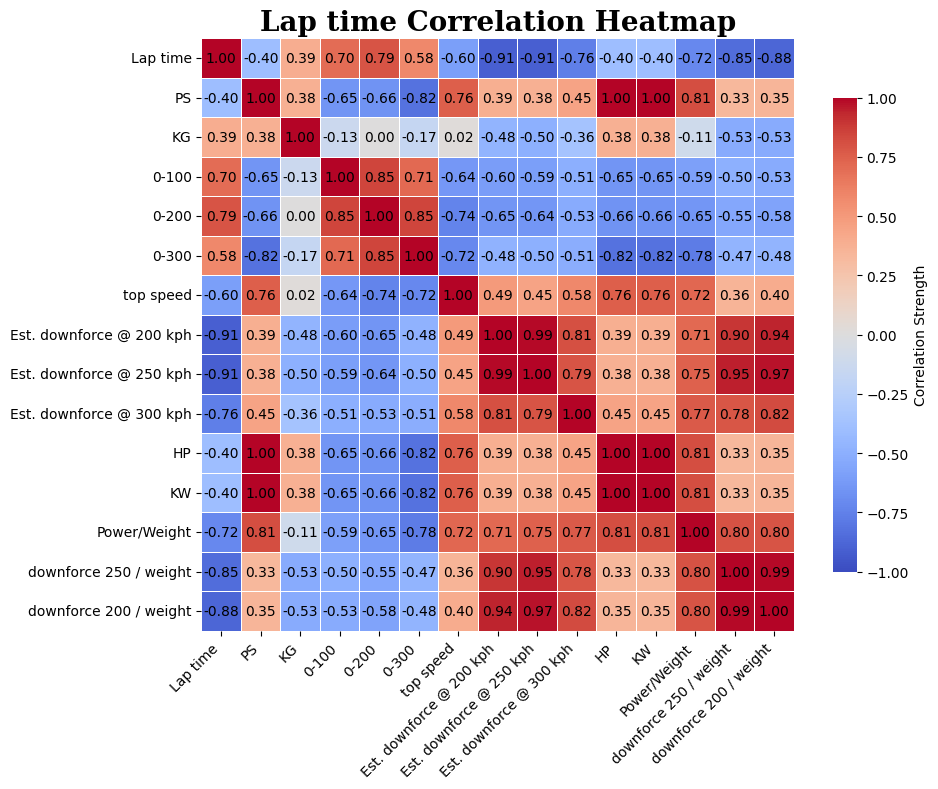

In [6]:
cordf = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
graph = sns.heatmap(cordf,annot=True,fmt=".2f",cmap="coolwarm",vmin=-1, vmax=1,linewidths=0.5,cbar_kws={"shrink": 0.8, "label": "Correlation Strength"},square=True,annot_kws={"size": 10, "color": "black"})
plt.title("Lap time Correlation Heatmap", title)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

### Adding 100 to 200 time

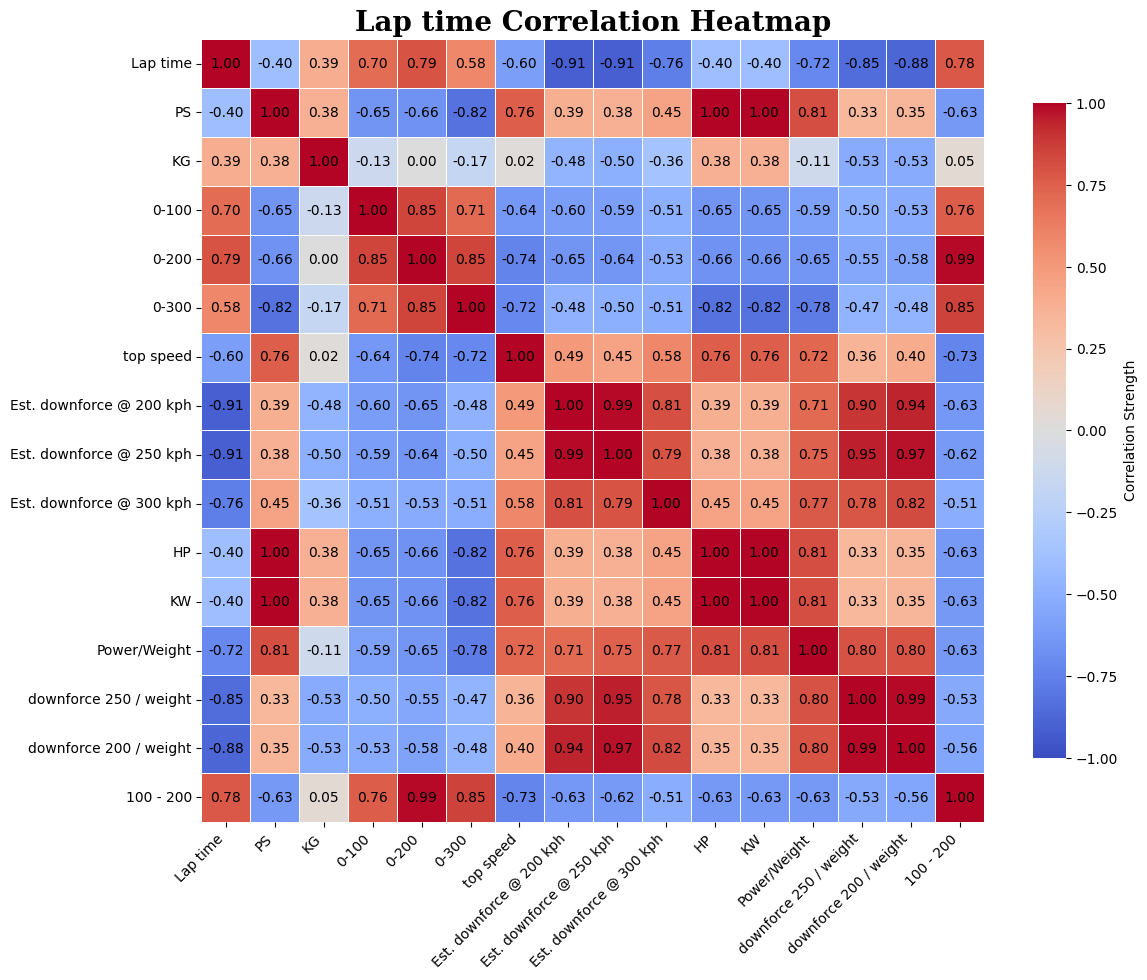

In [7]:
df["100 - 200"] = df["0-200"] - df["0-100"]

cordf = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
graph = sns.heatmap(cordf,annot=True,fmt=".2f",cmap="coolwarm",vmin=-1, vmax=1,linewidths=0.5,cbar_kws={"shrink": 0.8, "label": "Correlation Strength"},square=True,annot_kws={"size": 10, "color": "black"})
plt.title("Lap time Correlation Heatmap", title)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

### From this we actually get some really interesting results. 
### Downforce, Power to weight, and acceleration, especially 0-200 are really important.
### Makes sense:
### 1) Nurburgring Nordschliefe is 20.8 kms, its really twisty, with a lot of blind but fast corners and insane elevation changes. 
### 2) Mechanical Grip is considered the most important. And downforce is obviously the best way to get grip.
### The more the car gets pressed into the ground, the more grip it will get. Therefore more downforce => lower lap times. 
### 3) Power to weight is far more important than power or weight standing alone. Again correct. The more horsepower you have per kilogram, the more agile the car will be. 
### 4) Another thing to note, Horsepower is slightly more correlated. This because nurburging is twisty, heavier cars will get thrown around a lot. 
### 5) Acceleration at 0-200 > 0-100 > 0-300. This is because of the constant steering and breaks, cars usually stay within the range of 100 - 200 and 200 - 300 for some really fast ones like 919 Hybrid Evo or AMG one. 
### Lets actually see the average speeds throughout the course. 
### Avg Speed = (20800/Lap time)* 3600/1000 

In [8]:
df["Avg Speed"] = (20800)/df["Lap time"]*3.6
notnandf["Avg Speed"] = (20800)/notnandf["Lap time"]*3.6
df.head()

Car  Lap time    PS    KG  \
0                             Porsche 919 Hybrid Evo    319.55  1160   829   
1                                     Volkswagen IDR    365.36   680  1100   
2                                 Mercedes - AMG One    389.09  1063  1620   
3  Porsche 911 GT2 RS Manthey Performance Kit (991)     400.30   700  1420   
4                                AMG GT Black Series    408.05   730  1637   

   0-100  0-200  0-300  top speed  Est. downforce @ 200 kph  \
0   1.80    4.1    8.5      369.0                     900.0   
1   2.25    4.5    inf      270.0                     650.0   
2   2.70    7.0   15.6      352.0                     752.0   
3   2.60    7.8   21.5      343.0                     469.0   
4   2.80    8.3   26.7      352.0                     449.0   

   Est. downforce @ 250 kph  ...  Drivetrain Powertrain    Aspiration  \
0                    1600.0  ...         AWD     Hybrid  Turbocharged   
1                    1200.0  ...         AWD   Electric      Electric   
2                    1000.0  ...         AWD     Hybrid  Turbocharged   
3                     621.0  ...         RWD        ICE  Turbocharged   
4                     600.0  ...         RWD        ICE  Turbocharged   

         HP          KW  Power/Weight  downforce 250 / weight  \
0  853.1800  1144.13120      1.380134                1.930036   
1  500.1400   670.69760      0.609725                1.090909   
2  781.8365  1048.45816      0.647196                0.617284   
3  514.8500   690.42400      0.486214                0.437324   
4  536.9150   720.01360      0.439837                0.366524   

   downforce 200 / weight  100 - 200   Avg Speed  
0                1.085645       2.30  234.329526  
1                0.590909       2.25  204.948544  
2                0.464198       4.30  192.449048  
3                0.330282       5.20  187.059705  
4                0.274282       5.50  183.506923  

[5 rows x 21 columns]

In [9]:
df.describe()

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Lap time           PS           KG      0-100   0-200  0-300  \
count   54.000000    54.000000    54.000000  53.000000  53.000   52.0   
mean   443.144074   716.944444  1758.185185   3.358264     inf    inf   
std     35.551354   434.637711   384.663983   1.030279     NaN    NaN   
min    319.550000   300.000000   829.000000   1.800000   4.100    8.5   
25%    419.352500   502.500000  1447.750000   2.700000   8.787   23.5   
50%    447.005000   600.000000  1664.000000   3.200000  10.600   31.3   
75%    467.980000   695.000000  2145.750000   3.800000  15.500    NaN   
max    523.000000  3018.000000  2655.000000   5.800000     inf    inf   

        top speed  Est. downforce @ 200 kph  Est. downforce @ 250 kph  \
count   54.000000                 51.000000                 51.000000   
mean   307.853731                167.196078                251.764706   
std     49.397849                216.899426                343.598579   
min    199.000000                  0.000000                  0.000000   
25%    270.500000                  0.000000                  0.000000   
50%    315.000000                 70.000000                120.000000   
75%    332.000000                290.500000                436.500000   
max    496.000000                900.000000               1600.000000   

       Est. downforce @ 300 kph           HP           KW  Power/Weight  \
count                 51.000000    54.000000    54.000000     54.000000   
mean                 276.392157   527.312639   707.136644      0.407357   
std                  431.451971   319.676037   428.691868      0.220572   
min                    0.000000   220.650000   295.896000      0.178681   
25%                    0.000000   369.588750   495.625800      0.298629   
50%                  120.000000   441.300000   591.792000      0.339204   
75%                  458.500000   511.172500   685.492400      0.409800   
max                 2400.000000  2219.739000  2976.713760      1.380134   

       downforce 250 / weight  downforce 200 / weight  100 - 200   Avg Speed  
count               51.000000               51.000000     53.000   54.000000  
mean                 0.181257                0.117742        inf  170.135004  
std                  0.325512                0.191808        NaN   14.923559  
min                  0.000000                0.000000      2.250  143.173996  
25%                  0.000000                0.000000      6.174  160.006894  
50%                  0.061842                0.037493      7.284  167.514983  
75%                  0.260701                0.171833     11.400  178.561109  
max                  1.930036                1.085645        inf  234.329526

### The mean AVG Speed of the sample is 170 km/h
### Let us plot a 95% confidence interval around this.

In [10]:
#Importing custom library 

import myStats as ms
dir(ms)

['ANOVA_OneWay',
 'Chi',
 'GoF',
 'HypoTestingHelper',
 'LinearReg',
 'LinearRegression',
 'LogisticReg',
 'LogisticRegression',
 'PopulationCentral',
 'SampleCentral',
 'TTest',
 'TTestPooled',
 'TTesteWelch',
 'ZTest',
 'ZTestDifference',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'math',
 'np',
 'pd',
 'plt',
 'sns',
 'stats']

![Avg Speed Google Search](images/avgSpeedAssumption.png)


### For now let us consider the population average speed to be 170 km/h as well

### H0: The population avg speed is 170 km/h
### H1: The population avg speed is not 170 km/h

In [11]:
AvgSpeedObject = ms.HypoTestingHelper.TTest(s = 14.830321 , n = 54 , xbar = 170.476734 , mu = 170)
AvgSpeedObject.checkCI(confidence=90 , tail = "both")

'Failed to reject H0'

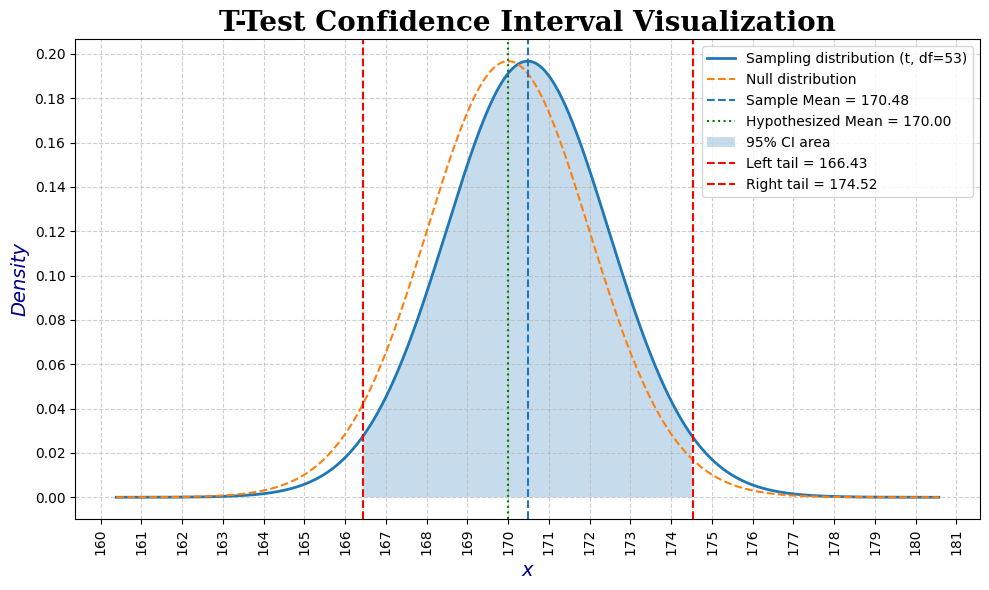

In [12]:
AvgSpeedObject.plotCI(confidence=95 , tail = "both")

In [13]:
AvgSpeedObject.getp(tail = "both")

np.float64(0.8141700597441837)

In [14]:
AvgSpeedObject.checkp(alpha = 5)

'Failed to reject H0. There is a 81.41700597441837% chance for sample to be equally or more extreme given H0 is true.'

### Not lets compare different types of cars. 
### First lets look into the different powertrains.

In [15]:
df["Powertrain"].unique()

array(['Hybrid', 'Electric', 'ICE'], dtype=object)

In [16]:
df.groupby("Powertrain")["Lap time"].mean()

Powertrain
Electric    457.278125
Hybrid      393.710000
ICE         442.308529
Name: Lap time, dtype: float64

C:\Users\dell\AppData\Local\Temp\ipykernel_29116\631708747.py:5: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis = "x" , nbins = 20)


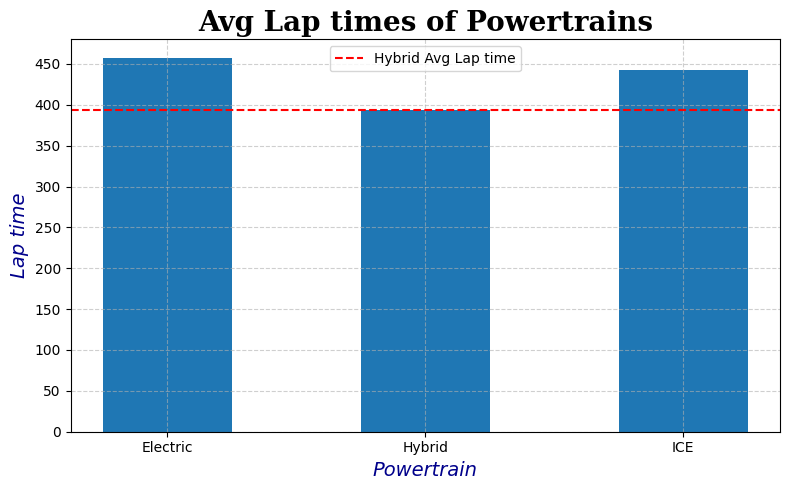

In [17]:
plt.figure(figsize=(8,5))
plt.bar(df.groupby("Powertrain")["Lap time"].mean().index , df.groupby("Powertrain")["Lap time"].mean() , width = 0.5)
plt.axhline(y = df.groupby("Powertrain")["Lap time"].mean()["Hybrid"] ,color = "red" , linestyle = "--" , label = "Hybrid Avg Lap time")
plt.title("Avg Lap times of Powertrains" , title)
plt.locator_params(axis = "x" , nbins = 20)
plt.locator_params(axis = "y" , nbins = 10)
plt.xlabel("Powertrain" , label)
plt.ylabel("Lap time" , label)
plt.legend()
plt.grid(True, alpha=0.6, linestyle="--")
plt.tight_layout()
plt.show()

### Hybrid cards are indeed the fastest because electric motors provide high acceleration and ICEs are good at gaining and maintaining higher speeds.

### Electric cars can quickly go from 0-100, but take time to go beyond 250s. ICE might have slower acceleration but can go beyond 300 once they get going. Hybrid combines them both. 

In [18]:
df.head()

Car  Lap time    PS    KG  \
0                             Porsche 919 Hybrid Evo    319.55  1160   829   
1                                     Volkswagen IDR    365.36   680  1100   
2                                 Mercedes - AMG One    389.09  1063  1620   
3  Porsche 911 GT2 RS Manthey Performance Kit (991)     400.30   700  1420   
4                                AMG GT Black Series    408.05   730  1637   

   0-100  0-200  0-300  top speed  Est. downforce @ 200 kph  \
0   1.80    4.1    8.5      369.0                     900.0   
1   2.25    4.5    inf      270.0                     650.0   
2   2.70    7.0   15.6      352.0                     752.0   
3   2.60    7.8   21.5      343.0                     469.0   
4   2.80    8.3   26.7      352.0                     449.0   

   Est. downforce @ 250 kph  ...  Drivetrain Powertrain    Aspiration  \
0                    1600.0  ...         AWD     Hybrid  Turbocharged   
1                    1200.0  ...         AWD   Electric      Electric   
2                    1000.0  ...         AWD     Hybrid  Turbocharged   
3                     621.0  ...         RWD        ICE  Turbocharged   
4                     600.0  ...         RWD        ICE  Turbocharged   

         HP          KW  Power/Weight  downforce 250 / weight  \
0  853.1800  1144.13120      1.380134                1.930036   
1  500.1400   670.69760      0.609725                1.090909   
2  781.8365  1048.45816      0.647196                0.617284   
3  514.8500   690.42400      0.486214                0.437324   
4  536.9150   720.01360      0.439837                0.366524   

   downforce 200 / weight  100 - 200   Avg Speed  
0                1.085645       2.30  234.329526  
1                0.590909       2.25  204.948544  
2                0.464198       4.30  192.449048  
3                0.330282       5.20  187.059705  
4                0.274282       5.50  183.506923  

[5 rows x 21 columns]

### Doing the same for Drivetrain and Aspiration

In [19]:
df.groupby("Aspiration")["Lap time"].mean()

Aspiration
Electric              457.278125
Natural Aspiration    435.602667
Supercharged          412.070000
Turbocharged          439.419091
Name: Lap time, dtype: float64

C:\Users\dell\AppData\Local\Temp\ipykernel_29116\849986881.py:5: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis = "x" , nbins = 20)


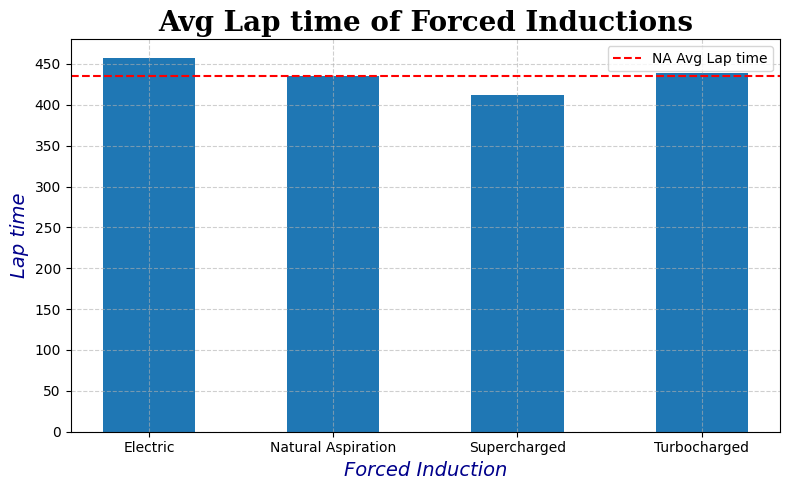

In [20]:
plt.figure(figsize=(8,5))
plt.bar(df.groupby("Aspiration")["Lap time"].mean().index , df.groupby("Aspiration")["Lap time"].mean() , width = 0.5)
plt.axhline(y = df.groupby("Aspiration")["Lap time"].mean()["Natural Aspiration"] ,color = "red" , linestyle = "--" , label = "NA Avg Lap time")
plt.title("Avg Lap time of Forced Inductions" , title)
plt.locator_params(axis = "x" , nbins = 20)
plt.locator_params(axis = "y" , nbins = 10)
plt.xlabel("Forced Induction" , label)
plt.ylabel("Lap time" , label)
plt.legend()
plt.grid(True, alpha=0.6, linestyle="--")
plt.tight_layout()
plt.show()

### That does not seem correct. Turbochargers or NA in practice are the way to go.
### And turbos are supposed to be better. But I think we are including slower cars (not meant for track) like heavy mercs and BMWs.
### In those cars turbos ensure smooth rides, not insane speed.

In [21]:
df.groupby("Aspiration")["Lap time"].count()

Aspiration
Electric              16
Natural Aspiration    15
Supercharged           1
Turbocharged          22
Name: Lap time, dtype: int64

### The only supercharged car here is Mustang GTD which is Ford's premiere track car and has some insane specs. That supercharged car is an outlier.

![MustangGTD](images/mustangGTD.png)


### Lets look at top 25 or so cars to properly compare race purpose turbos. 

C:\Users\dell\AppData\Local\Temp\ipykernel_29116\3103158572.py:5: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis = "x" , nbins = 20)


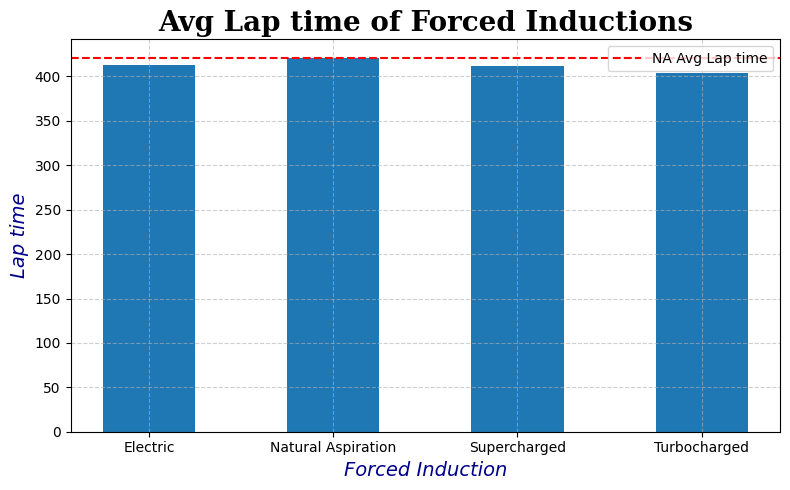

In [22]:
plt.figure(figsize=(8,5))
plt.bar(df.head(25).groupby("Aspiration")["Lap time"].mean().index , df.head(25).groupby("Aspiration")["Lap time"].mean() , width = 0.5)
plt.axhline(y = df.head(25).groupby("Aspiration")["Lap time"].mean()["Natural Aspiration"] ,color = "red" , linestyle = "--" , label = "NA Avg Lap time")
plt.title("Avg Lap time of Forced Inductions" , title)
plt.locator_params(axis = "x" , nbins = 20)
plt.locator_params(axis = "y" , nbins = 10)
plt.xlabel("Forced Induction" , label)
plt.ylabel("Lap time" , label)
plt.legend()
plt.grid(True, alpha=0.6, linestyle="--")
plt.tight_layout()
plt.show()

### As expected, Turbos seem faster here.
### Turbos are technically faster but much harder to control as the turbo lag might be unpredictable. NA cars offer superior control and predictability but lesser raw horsepower. This is why the GT3 RS is easier to drive but the GT2 RS (which is turbocharged) with Manthey Performance Kit performed better on the Nurburgring.
### Note: This doesnt mean electric is fast. The top 25 included the likes of IDR, SU 7 Ultra and U9 Extreme which are the best electric cars. Most of the electric cars are at the bottom of the list.

In [23]:
df.tail(10)

Car  Lap time   PS    KG  0-100  0-200  0-300  \
44        Renault Mégane RS Trophy    474.00  400  1430    5.7   17.9    inf   
45   Chevrolet Camaro SS (6th Gen)    474.79  455  1500    4.0   15.5    inf   
46       Porsche 718 Cayman (Base)    475.22  500  1405    5.1   18.4    inf   
47               Porsche Taycan 4S    487.00  571  2295    4.0   17.8    inf   
48                      BMW i4 M50    487.60  544  2285    3.9   18.6    inf   
49                 Toyota GR Yaris    489.00  361  1280    5.5   21.2    inf   
50  Lamborghini Diablo SuperVeloce    489.00  530  1530    3.8   12.5   32.0   
51       Tesla Model 3 Performance    490.00  483  1847    3.3   17.8    inf   
52     Mercedes-AMG EQS 53 4MATIC+    496.78  666  2655    3.4   19.6    inf   
53                   Jaguar I-PACE    523.00  400  2208    4.8    inf    inf   

    top speed  Est. downforce @ 200 kph  Est. downforce @ 250 kph  ...  \
44      260.0                       0.0                       0.0  ...   
45      280.0                       0.0                       0.0  ...   
46      275.0                       0.0                       0.0  ...   
47      250.0                       0.0                       0.0  ...   
48      225.0                       0.0                       0.0  ...   
49      230.0                       0.0                       0.0  ...   
50      329.0                       0.0                       0.0  ...   
51      261.0                       0.0                       0.0  ...   
52      250.0                       0.0                       0.0  ...   
53      199.0                       0.0                       0.0  ...   

    Drivetrain Powertrain          Aspiration        HP         KW  \
44         FWD        ICE        Turbocharged  294.2000  394.52800   
45         RWD        ICE  Natural Aspiration  334.6525  448.77560   
46         RWD        ICE        Turbocharged  367.7500  493.16000   
47         AWD   Electric            Electric  419.9705  563.18872   
48         AWD   Electric            Electric  400.1120  536.55808   
49         AWD        ICE        Turbocharged  265.5155  356.06152   
50         AWD        ICE  Natural Aspiration  389.8150  522.74960   
51         AWD   Electric            Electric  355.2465  476.39256   
52         AWD   Electric            Electric  489.8430  656.88912   
53         AWD   Electric            Electric  294.2000  394.52800   

    Power/Weight  downforce 250 / weight  downforce 200 / weight  100 - 200  \
44      0.275894                     0.0                     0.0       12.2   
45      0.299184                     0.0                     0.0       11.5   
46      0.351004                     0.0                     0.0       13.3   
47      0.245398                     0.0                     0.0       13.8   
48      0.234818                     0.0                     0.0       14.7   
49      0.278173                     0.0                     0.0       15.7   
50      0.341666                     0.0                     0.0        8.7   
51      0.257928                     0.0                     0.0       14.5   
52      0.247416                     0.0                     0.0       16.2   
53      0.178681                     0.0                     0.0        inf   

     Avg Speed  
44  157.974684  
45  157.711830  
46  157.569126  
47  153.757700  
48  153.568499  
49  153.128834  
50  153.128834  
51  152.816327  
52  150.730706  
53  143.173996  

[10 rows x 21 columns]

C:\Users\dell\AppData\Local\Temp\ipykernel_29116\1026457712.py:5: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis = "x" , nbins = 20)


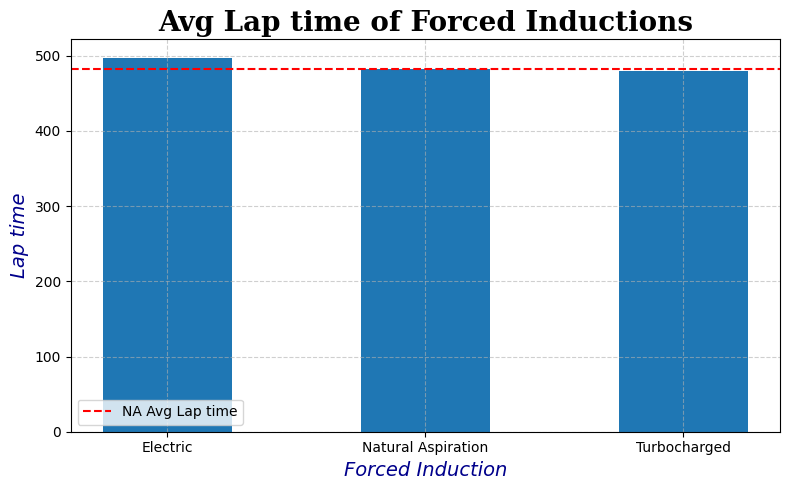

In [24]:
plt.figure(figsize=(8,5))
plt.bar(df.tail(10).groupby("Aspiration")["Lap time"].mean().index , df.tail(10).groupby("Aspiration")["Lap time"].mean() , width = 0.5)
plt.axhline(y = df.tail(10).groupby("Aspiration")["Lap time"].mean()["Natural Aspiration"] ,color = "red" , linestyle = "--" , label = "NA Avg Lap time")
plt.title("Avg Lap time of Forced Inductions" , title)
plt.locator_params(axis = "x" , nbins = 20)
plt.locator_params(axis = "y" , nbins = 10)
plt.xlabel("Forced Induction" , label)
plt.ylabel("Lap time" , label)
plt.legend()
plt.grid(True, alpha=0.6, linestyle="--")
plt.tight_layout()
plt.show()

### Now lets compare drivetrains

C:\Users\dell\AppData\Local\Temp\ipykernel_29116\4274629418.py:5: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis = "x" , nbins = 20)


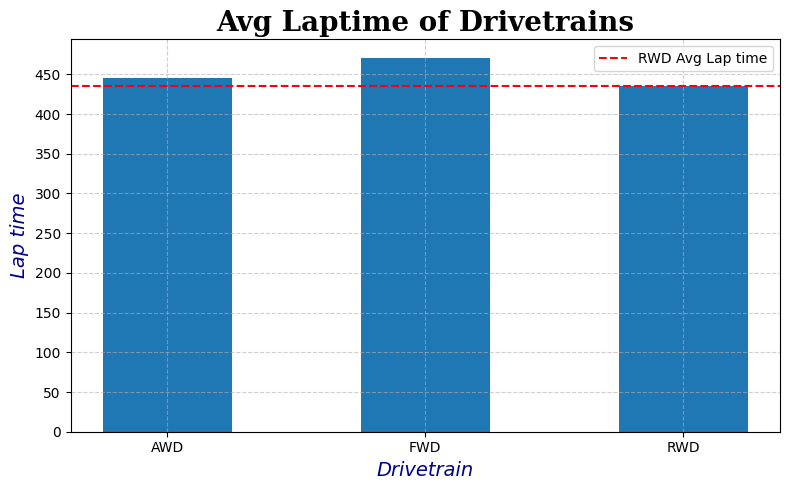

In [25]:
plt.figure(figsize=(8,5))
plt.bar(df.groupby("Drivetrain")["Lap time"].mean().index , df.groupby("Drivetrain")["Lap time"].mean() , width = 0.5)
plt.axhline(y = df.groupby("Drivetrain")["Lap time"].mean()["RWD"] ,color = "red" , linestyle = "--" , label = "RWD Avg Lap time")
plt.title("Avg Laptime of Drivetrains" , title)
plt.locator_params(axis = "x" , nbins = 20)
plt.locator_params(axis = "y" , nbins = 10)
plt.xlabel("Drivetrain" , label)
plt.ylabel("Lap time" , label)
plt.legend()
plt.grid(True, alpha=0.6, linestyle="--")
plt.tight_layout()
plt.show()

### Front wheel drive cars struggle at the nurburgring because there are sharp turns at elevations which causes FWD cars to skid.

### Lets test the hypothesis that there is no signigicant difference between the performance of RWD and AWD cars
### H0 = Avg lap time of RWD cars is equal to Avg laptime of AWD cars (muRWD - muAWD = 0)
### H1 = not equal
### We will use Welch's t test because we dont know anything about population varinces and will have to calculate the degrees of freedom while assuming different variances.

In [26]:
df.groupby("Drivetrain")["Lap time"].std()

Drivetrain
AWD    44.497211
FWD     4.385365
RWD    23.624209
Name: Lap time, dtype: float64

In [27]:
df.groupby("Drivetrain")["Lap time"].count()

Drivetrain
AWD    26
FWD     4
RWD    24
Name: Lap time, dtype: int64

In [28]:
df.groupby("Drivetrain")["Lap time"].mean()

Drivetrain
AWD    445.951538
FWD    470.527500
RWD    435.538750
Name: Lap time, dtype: float64

In [29]:
xbar_difference = df.groupby("Drivetrain")["Lap time"].mean()["AWD"] - df.groupby("Drivetrain")["Lap time"].mean()["RWD"]

In [30]:
DriveTrainAvgObject = ms.HypoTestingHelper.TTesteWelch(n1 = 26 , s1 = 44.497211 ,n2 = 24 , s2 = 22.087261 , xbar_diff=xbar_difference,mu_diff=0)

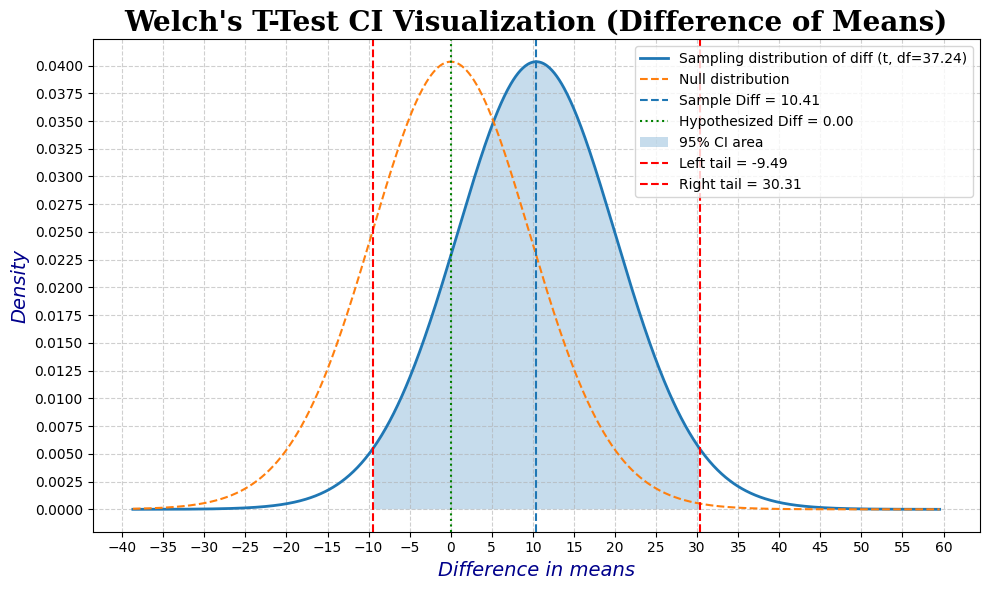

In [31]:
DriveTrainAvgObject.plotCI(confidence=95)

In [32]:
DriveTrainAvgObject.getp()

np.float64(0.29592647814053974)

In [33]:
DriveTrainAvgObject.checkp(alpha=5)

'Failed to reject H0. There is a 29.592647814053976% chance for sample to be equally or more extreme given H0 is true.'

### Okay so we failed to reject H0. 
### But what about NA and Turbo cars and ICE vs Electric. Let us now compare those as well.

In [34]:
df.groupby("Aspiration")["Lap time"].std()

Aspiration
Electric              38.472960
Natural Aspiration    24.404332
Supercharged                NaN
Turbocharged          38.499110
Name: Lap time, dtype: float64

In [35]:
NAvsTruboObj = ms.HypoTestingHelper.TTesteWelch(s1 = df.groupby("Aspiration")["Lap time"].std()["Natural Aspiration"] , s2 = df.groupby("Aspiration")["Lap time"].std()["Turbocharged"],n1 = df.groupby("Aspiration")["Lap time"].count()["Natural Aspiration"] , n2 = df.groupby("Aspiration")["Lap time"].count()["Turbocharged"],xbar_diff= (df.groupby("Aspiration")["Lap time"].mean()["Natural Aspiration"] - df.groupby("Aspiration")["Lap time"].mean()["Turbocharged"]) , mu_diff=0)

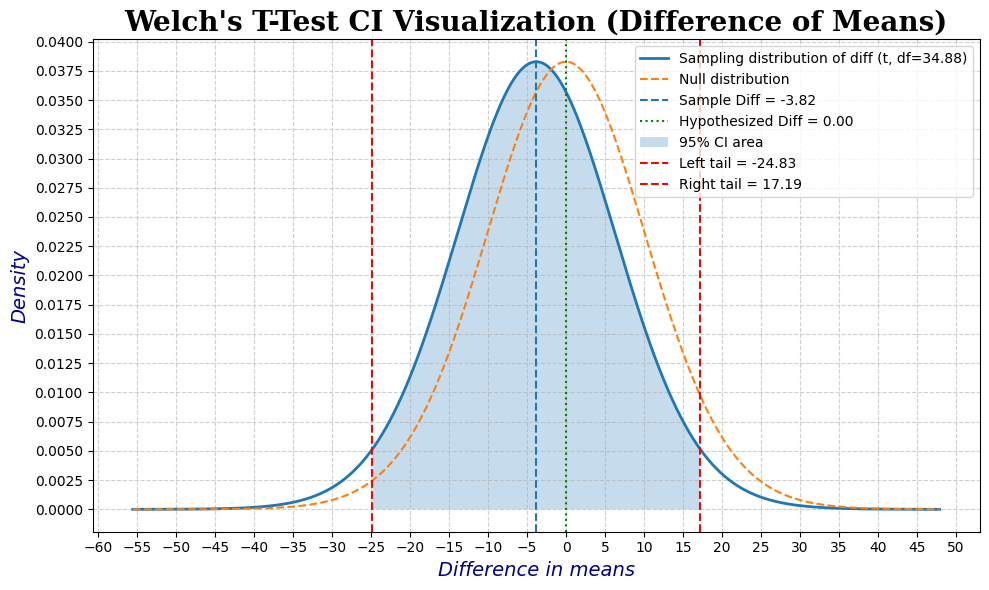

In [36]:
NAvsTruboObj.plotCI(confidence=95)

In [37]:
NAvsTruboObj.checkp(alpha = 5)

'Failed to reject H0. There is a 71.44947558823426% chance for sample to be equally or more extreme given H0 is true.'

### So there is no significant difference in performance between NA and Turbo Engines

In [38]:
df.groupby("Powertrain")["Lap time"].std()

Powertrain
Electric    38.472960
Hybrid      57.037800
ICE         25.837008
Name: Lap time, dtype: float64

In [39]:
ICEvsElecOBJ = ms.HypoTestingHelper.TTesteWelch(s1 = df.groupby("Powertrain")["Lap time"].std()["ICE"] , n1 = df.groupby("Powertrain")["Lap time"].count()["ICE"],s2 = df.groupby("Powertrain")["Lap time"].std()["Electric"] , n2 = df.groupby("Powertrain")["Lap time"].count()["Electric"] , xbar_diff=(df.groupby("Powertrain")["Lap time"].mean()["ICE"] - df.groupby("Powertrain")["Lap time"].mean()["Electric"]) , mu_diff=0)

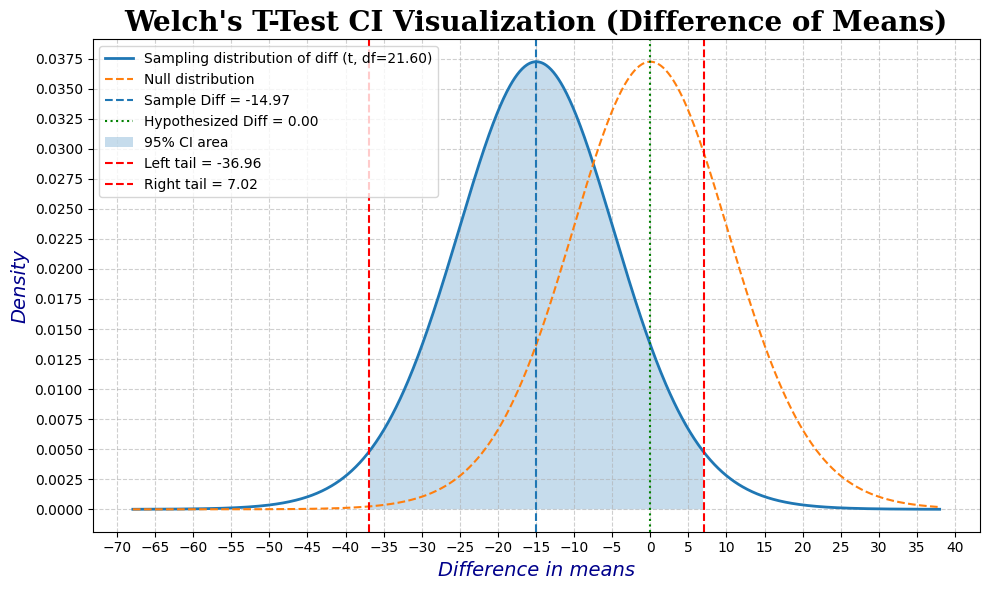

In [40]:
ICEvsElecOBJ.plotCI(confidence = 95)

In [41]:
ICEvsElecOBJ.checkp(alpha=5)

'Failed to reject H0. There is a 17.173486190940405% chance for sample to be equally or more extreme given H0 is true.'

### A 14% chance is still acceptable.

### What about ICE vs Hybrid

In [42]:
ICEvsHybirdOBJ = ms.HypoTestingHelper.TTesteWelch(s1 = df.groupby("Powertrain")["Lap time"].std()["ICE"] , n1 = df.groupby("Powertrain")["Lap time"].count()["ICE"],s2 = df.groupby("Powertrain")["Lap time"].std()["Hybrid"] , n2 = df.groupby("Powertrain")["Lap time"].count()["Hybrid"] , xbar_diff=(df.groupby("Powertrain")["Lap time"].mean()["ICE"] - df.groupby("Powertrain")["Lap time"].mean()["Hybrid"]) , mu_diff=0)

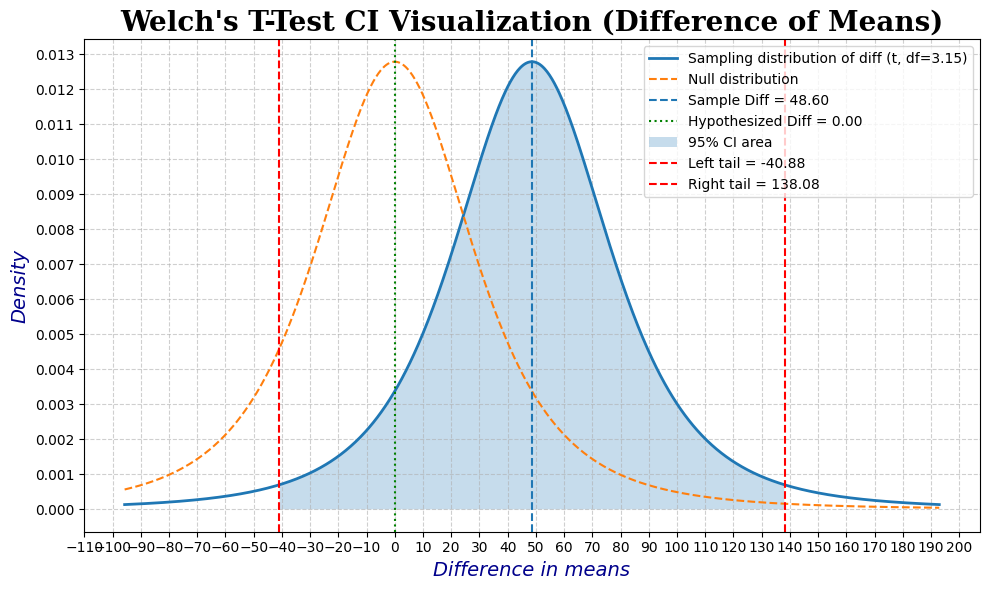

In [43]:
ICEvsHybirdOBJ.plotCI(confidence=95)

In [44]:
ICEvsHybirdOBJ.checkp(alpha=5)

'Failed to reject H0. There is a 18.65349969776162% chance for sample to be equally or more extreme given H0 is true.'

### 12 % only. Eh.... Ill accept this as well. Its rare but certainly plausible. 

### Now we will perform some ANOVA

### First between Aspiration / Forced Induction

In [45]:
tempDict = {
    "NA" : df.where(df["Aspiration"] == "Natural Aspiration")["Lap time"].dropna().values,
    "Turbo": df.where(df["Aspiration"] == "Turbocharged")["Lap time"].dropna().values,
    "Electric":df.where(df["Aspiration"] == "Electric")["Lap time"].dropna().values
}
tempDict

{'NA': array([409.3 , 413.34, 414.74, 415.29, 416.45, 419.93, 423.12, 429.3 ,
        431.83, 434.64, 449.  , 453.  , 460.31, 474.79, 489.  ]),
 'Turbo': array([319.55, 389.09, 400.3 , 408.05, 409.27, 410.76, 423.92, 435.02,
        441.63, 445.  , 446.7 , 448.  , 456.93, 459.63, 460.  , 464.88,
        468.14, 469.23, 472.9 , 474.  , 475.22, 489.  ]),
 'Electric': array([365.36, 419.16, 424.96, 425.3 , 427.55, 447.31, 453.  , 462.34,
        465.59, 467.5 , 474.  , 487.  , 487.6 , 490.  , 496.78, 523.  ])}

In [46]:
AnovaObject = ms.HypoTestingHelper.ANOVA_OneWay(groups= tempDict)

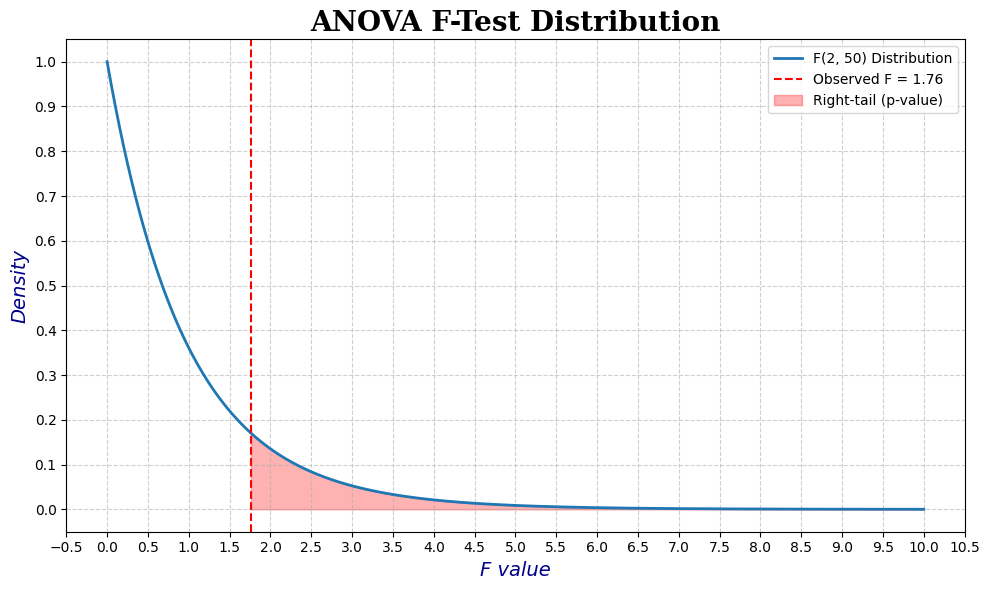

In [47]:
AnovaObject.plotF()

In [48]:
AnovaObject.checkp(alpha = 5)

'Failed to reject H0. p = 0.1829. Groups likely have equal means.'

### Now between Powertrains

In [49]:
tempDict = {
    "ICE" : df.where(df["Powertrain"] == "ICE")["Lap time"].dropna().values,
    "Hybrid": df.where(df["Powertrain"] == "Hybrid")["Lap time"].dropna().values,
    "Electric":df.where(df["Powertrain"] == "Electric")["Lap time"].dropna().values
}
tempDict

{'ICE': array([400.3 , 408.05, 409.3 , 410.76, 412.07, 413.34, 414.74, 415.29,
        416.45, 419.93, 423.12, 423.92, 429.3 , 431.83, 434.64, 435.02,
        441.63, 445.  , 446.7 , 448.  , 449.  , 453.  , 459.63, 460.  ,
        460.31, 464.88, 468.14, 469.23, 472.9 , 474.  , 474.79, 475.22,
        489.  , 489.  ]),
 'Hybrid': array([319.55, 389.09, 409.27, 456.93]),
 'Electric': array([365.36, 419.16, 424.96, 425.3 , 427.55, 447.31, 453.  , 462.34,
        465.59, 467.5 , 474.  , 487.  , 487.6 , 490.  , 496.78, 523.  ])}

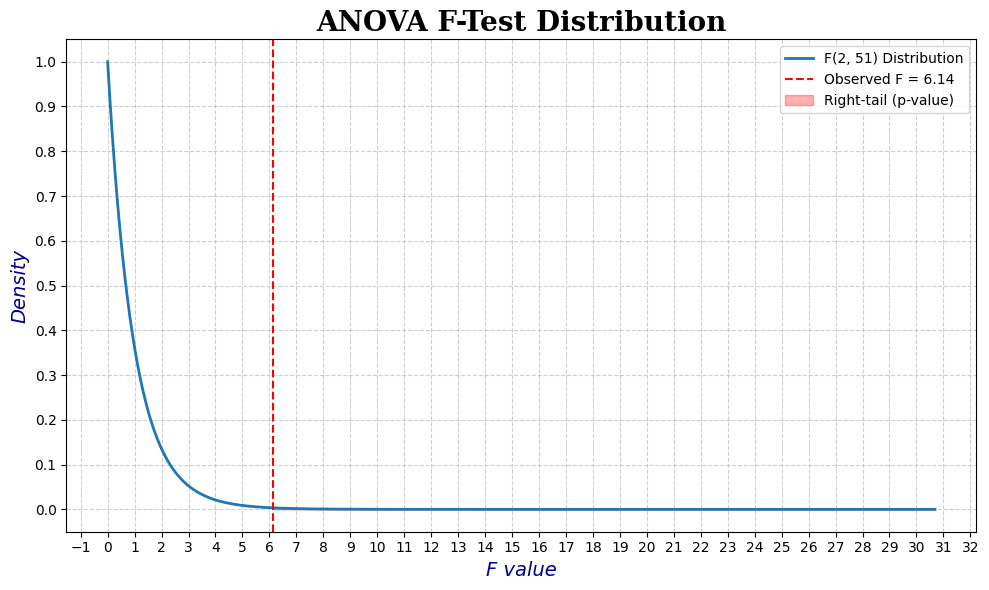

In [50]:
AnovaObject = ms.HypoTestingHelper.ANOVA_OneWay(groups= tempDict)
AnovaObject.plotF()

In [51]:
AnovaObject.checkp(alpha =5)

'Reject H0. p = 0.0041. At least one group mean differs.'

### True!!! Mean of Hybrids does differ significantly

### Now let us look at the relation of variables on laptimes

In [52]:
df.head()

Car  Lap time    PS    KG  \
0                             Porsche 919 Hybrid Evo    319.55  1160   829   
1                                     Volkswagen IDR    365.36   680  1100   
2                                 Mercedes - AMG One    389.09  1063  1620   
3  Porsche 911 GT2 RS Manthey Performance Kit (991)     400.30   700  1420   
4                                AMG GT Black Series    408.05   730  1637   

   0-100  0-200  0-300  top speed  Est. downforce @ 200 kph  \
0   1.80    4.1    8.5      369.0                     900.0   
1   2.25    4.5    inf      270.0                     650.0   
2   2.70    7.0   15.6      352.0                     752.0   
3   2.60    7.8   21.5      343.0                     469.0   
4   2.80    8.3   26.7      352.0                     449.0   

   Est. downforce @ 250 kph  ...  Drivetrain Powertrain    Aspiration  \
0                    1600.0  ...         AWD     Hybrid  Turbocharged   
1                    1200.0  ...         AWD   Electric      Electric   
2                    1000.0  ...         AWD     Hybrid  Turbocharged   
3                     621.0  ...         RWD        ICE  Turbocharged   
4                     600.0  ...         RWD        ICE  Turbocharged   

         HP          KW  Power/Weight  downforce 250 / weight  \
0  853.1800  1144.13120      1.380134                1.930036   
1  500.1400   670.69760      0.609725                1.090909   
2  781.8365  1048.45816      0.647196                0.617284   
3  514.8500   690.42400      0.486214                0.437324   
4  536.9150   720.01360      0.439837                0.366524   

   downforce 200 / weight  100 - 200   Avg Speed  
0                1.085645       2.30  234.329526  
1                0.590909       2.25  204.948544  
2                0.464198       4.30  192.449048  
3                0.330282       5.20  187.059705  
4                0.274282       5.50  183.506923  

[5 rows x 21 columns]

### Standardizing Power, KG, 0-200, Downforce at 250 and top speed.

In [53]:
df1 = notnandf.copy()
df1[df1["0-200"] > 100000].index
df1.drop(df1[df1["0-200"] > 100000].index , inplace = True)

In [54]:
df1["0-200"].unique()

array([ 4.1  ,  4.5  ,  7.   ,  7.8  ,  8.3  ,  5.8  ,  5.959, 10.098,
        9.2  ,  9.4  , 10.6  , 11.6  ,  8.4  ,  4.4  ,  6.4  , 10.   ,
       11.2  , 10.8  , 10.1  , 11.1  ,  6.7  , 10.7  ,  9.6  ,  9.7  ,
       13.8  , 18.8  ,  9.9  , 17.4  , 11.   , 12.   , 10.3  , 17.2  ,
       19.8  , 18.   , 17.9  , 15.5  , 18.4  , 17.8  , 18.6  , 21.2  ,
       12.5  , 19.6  ])

In [55]:
df1["Standard power"] = (df1["PS"] - df1["PS"].mean())/df1["PS"].std()
df1["Standard weight"] = (df1["KG"] - df1["KG"].mean())/df1["KG"].std()
df1["Standard 0-200"] = (df1["0-200"] - df1["0-200"].mean())/df1["0-200"].std()
df1["Standard downforce @ 250"] = (df1["Est. downforce @ 250 kph"] - df1["Est. downforce @ 250 kph"].mean())/df1["Est. downforce @ 250 kph"].std()
df1["Standard top speed"] = (df1["top speed"] - df1["top speed"].mean())/df1["top speed"].std()
df1["Standard Average speed"] = (df1["Avg Speed"] - df1["Avg Speed"].mean())/df1["Avg Speed"].std()
df1["Standard Power to weight"] = (df1["Power/Weight"] - df1["Power/Weight"].mean())/df1["Power/Weight"].std()
df1.head()

Car  Lap time    PS    KG  \
0                             Porsche 919 Hybrid Evo    319.55  1160   829   
1                                     Volkswagen IDR    365.36   680  1100   
2                                 Mercedes - AMG One    389.09  1063  1620   
3  Porsche 911 GT2 RS Manthey Performance Kit (991)     400.30   700  1420   
4                                AMG GT Black Series    408.05   730  1637   

   0-100  0-200  0-300  top speed  Est. downforce @ 200 kph  \
0   1.80    4.1    8.5      369.0                     900.0   
1   2.25    4.5    inf      270.0                     650.0   
2   2.70    7.0   15.6      352.0                     752.0   
3   2.60    7.8   21.5      343.0                     469.0   
4   2.80    8.3   26.7      352.0                     449.0   

   Est. downforce @ 250 kph  ...  downforce 250 / weight  \
0                    1600.0  ...                1.930036   
1                    1200.0  ...                1.090909   
2                    1000.0  ...                0.617284   
3                     621.0  ...                0.437324   
4                     600.0  ...                0.366524   

  downforce 200 / weight   Avg Speed Standard power  Standard weight  \
0               1.085645  234.329526       1.772993        -2.403974   
1               0.590909  204.948544       0.054719        -1.677822   
2               0.464198  192.449048       1.425759        -0.284467   
3               0.330282  187.059705       0.126314        -0.820373   
4               0.274282  183.506923       0.233706        -0.238915   

   Standard 0-200  Standard downforce @ 250  Standard top speed  \
0       -1.652323                  3.872931            1.571044   
1       -1.564690                  2.722735           -0.856147   
2       -1.016981                  2.147638            1.154254   
3       -0.841714                  1.057828            0.933600   
4       -0.732173                  0.997442            1.154254   

   Standard Average speed  Standard Power to weight  
0                4.260638                  5.069537  
1                2.310020                  1.111938  
2                1.480172                  1.304429  
3                1.122371                  0.477461  
4                0.886500                  0.239223  

[5 rows x 27 columns]

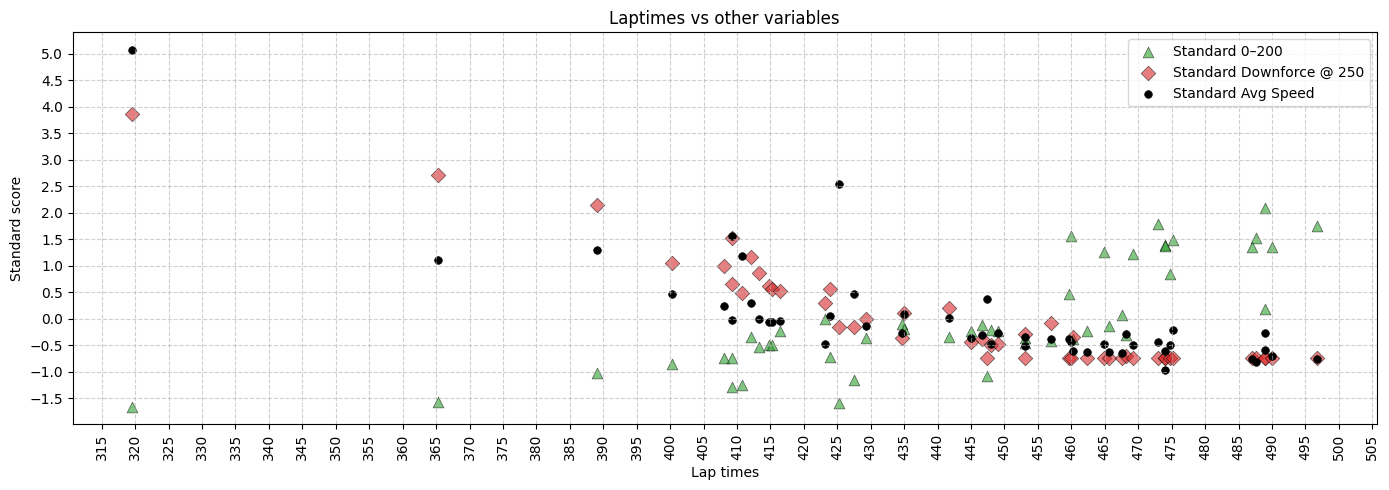

In [56]:
markers = ["o", "s", "^", "D", "P", "X"]
sizes = [40, 50, 60, 55, 50, 70]
alphas = [0.6, 0.6, 0.6, 0.6, 0.6, 1]   
edge = 'black'
lw = 0.5

#Using AI for colors
colors = [
    "#1f77b4",  
    "#ff7f0e",  
    "#2ca02c",  
    "#d62728", 
    "#9467bd",  
    "#00008b"   
]
plt.figure(figsize=(14,5))
#plt.scatter(df1["Lap time"], df1["Standard power"],s=sizes[0], c=colors[0], marker=markers[0],alpha=alphas[0], edgecolors=edge, linewidths=lw,label="Standard Power")
#plt.scatter(df1["Lap time"], df1["Standard weight"],s=sizes[1], c=colors[1], marker=markers[1], alpha=alphas[1], edgecolors=edge, linewidths=lw,label="Standard Weight")
plt.scatter(df1["Lap time"], df1["Standard 0-200"],s=sizes[2], c=colors[2], marker=markers[2],alpha=alphas[2], edgecolors=edge, linewidths=lw,label="Standard 0–200")
plt.scatter(df1["Lap time"], df1["Standard downforce @ 250"],s=sizes[3], c=colors[3], marker=markers[3],alpha=alphas[3], edgecolors=edge, linewidths=lw,label="Standard Downforce @ 250")
#plt.scatter(df1["Lap time"], df1["Standard top speed"],s=sizes[4], c=colors[4], marker=markers[4],alpha=alphas[4], edgecolors=edge, linewidths=lw,label="Standard Top Speed")
#plt.scatter(df1["Lap time"], df1["Standard Average speed"],s=sizes[5], c=colors[5], marker=markers[5],alpha=alphas[5], edgecolors=edge, linewidths=lw,label="Standard Avg Speed")
plt.scatter(df1["Lap time"], df1["Standard Power to weight"],s=30, c="black", marker=markers[0],alpha=alphas[5], edgecolors=edge, linewidths=lw,label="Standard Avg Speed")
plt.title("Laptimes vs other variables")
plt.xlabel("Lap times")
plt.ylabel("Standard score")
plt.grid(alpha=0.6, linestyle='--')
plt.locator_params(axis="x", nbins=40)
plt.locator_params(axis="y", nbins=20)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()



### NOTE: Comment out the ones that you dont want to see

### Un pivoting for box plot (dropping the columns that arent needed)

In [57]:
df_melt = df1.melt(id_vars="Lap time",value_vars=["Standard power","Standard weight","Standard 0-200","Standard downforce @ 250","Standard top speed","Standard Average speed" , "Standard Power to weight"],var_name="Variable",value_name="Standard Score")
df_melt

Lap time                  Variable  Standard Score
0      319.55            Standard power        1.772993
1      365.36            Standard power        0.054719
2      389.09            Standard power        1.425759
3      400.30            Standard power        0.126314
4      408.05            Standard power        0.233706
..        ...                       ...             ...
338    487.60  Standard Power to weight       -0.813965
339    489.00  Standard Power to weight       -0.591248
340    489.00  Standard Power to weight       -0.265082
341    490.00  Standard Power to weight       -0.695248
342    496.78  Standard Power to weight       -0.749248

[343 rows x 3 columns]

C:\Users\dell\AppData\Local\Temp\ipykernel_29116\1987083077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melt,x="Variable",y="Standard Score",palette="Set1", width=0.6, fliersize=3) #Using Ai to make it look aethetic


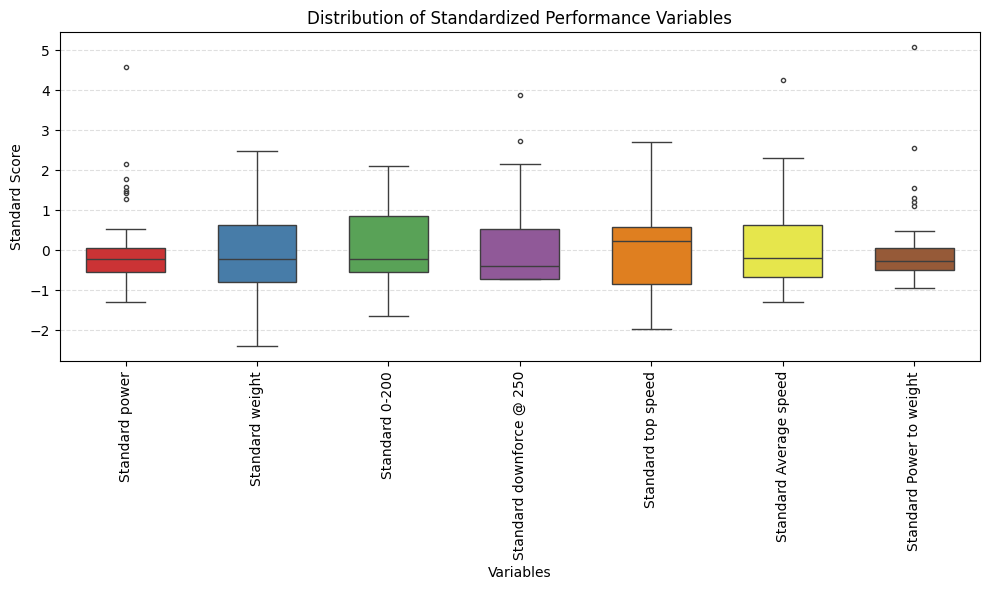

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melt,x="Variable",y="Standard Score",palette="Set1", width=0.6, fliersize=3) #Using Ai to make it look aethetic
plt.xticks(rotation=90)
plt.title("Distribution of Standardized Performance Variables")
plt.xlabel("Variables")
plt.ylabel("Standard Score")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_29116\855031592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_melt,x="Variable",y="Standard Score",palette="Set1", width=0.6 ) #Using Ai to make it look aethetic


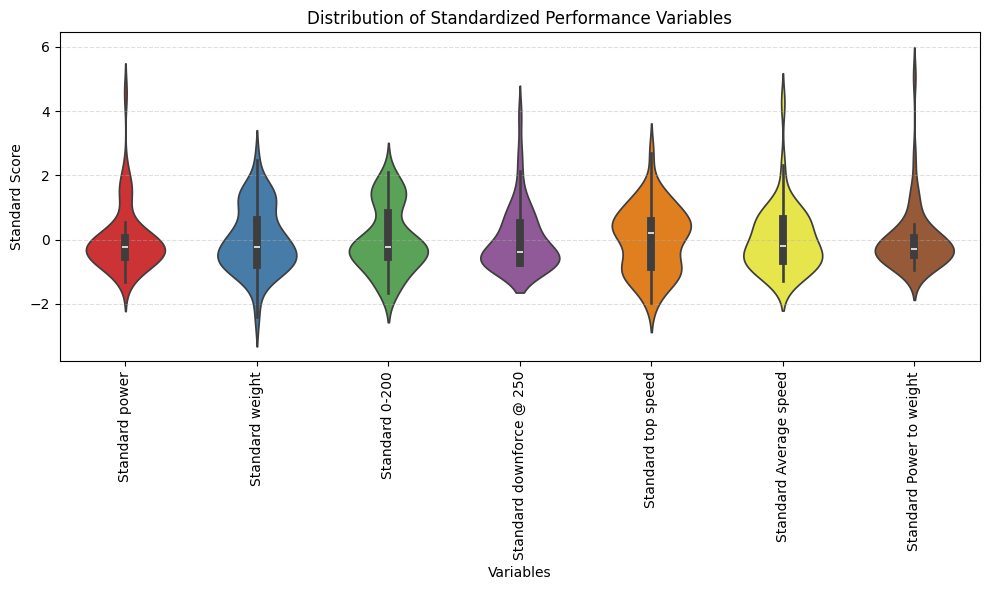

In [59]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df_melt,x="Variable",y="Standard Score",palette="Set1", width=0.6 ) #Using Ai to make it look aethetic
plt.xticks(rotation=90)
plt.title("Distribution of Standardized Performance Variables")
plt.xlabel("Variables")
plt.ylabel("Standard Score")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [60]:
df1.head()

Car  Lap time    PS    KG  \
0                             Porsche 919 Hybrid Evo    319.55  1160   829   
1                                     Volkswagen IDR    365.36   680  1100   
2                                 Mercedes - AMG One    389.09  1063  1620   
3  Porsche 911 GT2 RS Manthey Performance Kit (991)     400.30   700  1420   
4                                AMG GT Black Series    408.05   730  1637   

   0-100  0-200  0-300  top speed  Est. downforce @ 200 kph  \
0   1.80    4.1    8.5      369.0                     900.0   
1   2.25    4.5    inf      270.0                     650.0   
2   2.70    7.0   15.6      352.0                     752.0   
3   2.60    7.8   21.5      343.0                     469.0   
4   2.80    8.3   26.7      352.0                     449.0   

   Est. downforce @ 250 kph  ...  downforce 250 / weight  \
0                    1600.0  ...                1.930036   
1                    1200.0  ...                1.090909   
2                    1000.0  ...                0.617284   
3                     621.0  ...                0.437324   
4                     600.0  ...                0.366524   

  downforce 200 / weight   Avg Speed Standard power  Standard weight  \
0               1.085645  234.329526       1.772993        -2.403974   
1               0.590909  204.948544       0.054719        -1.677822   
2               0.464198  192.449048       1.425759        -0.284467   
3               0.330282  187.059705       0.126314        -0.820373   
4               0.274282  183.506923       0.233706        -0.238915   

   Standard 0-200  Standard downforce @ 250  Standard top speed  \
0       -1.652323                  3.872931            1.571044   
1       -1.564690                  2.722735           -0.856147   
2       -1.016981                  2.147638            1.154254   
3       -0.841714                  1.057828            0.933600   
4       -0.732173                  0.997442            1.154254   

   Standard Average speed  Standard Power to weight  
0                4.260638                  5.069537  
1                2.310020                  1.111938  
2                1.480172                  1.304429  
3                1.122371                  0.477461  
4                0.886500                  0.239223  

[5 rows x 27 columns]

### Lets one by one look at their relation with Lap times

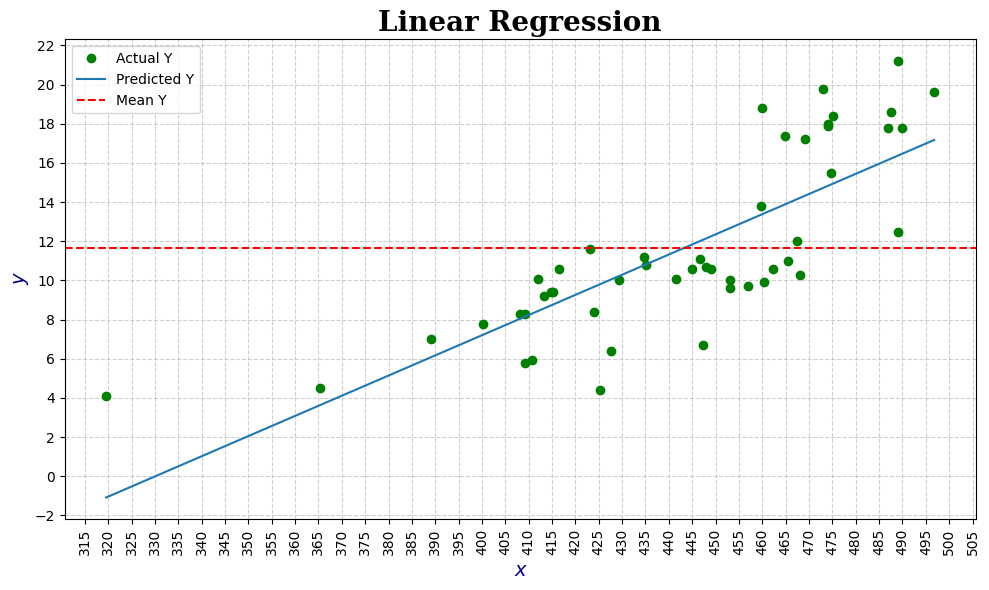

In [61]:
linRegObj1 = ms.LinearRegression.LinearReg(df1["Lap time"] , df1["0-200"])
linRegObj1.LoRPlot()

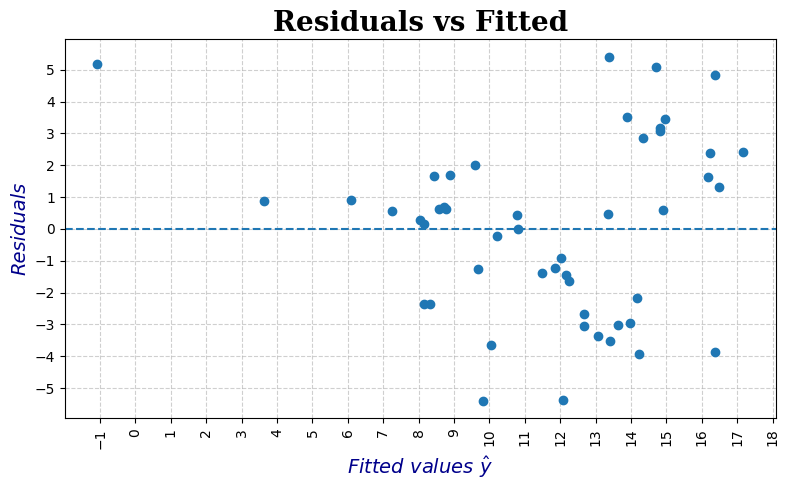

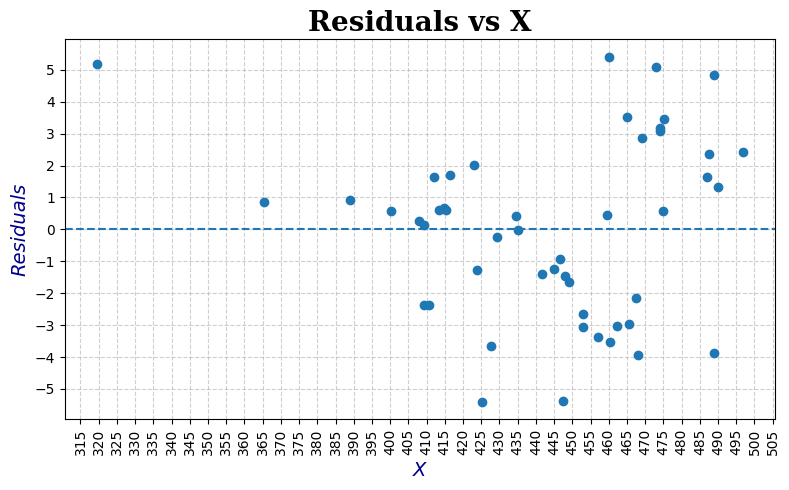

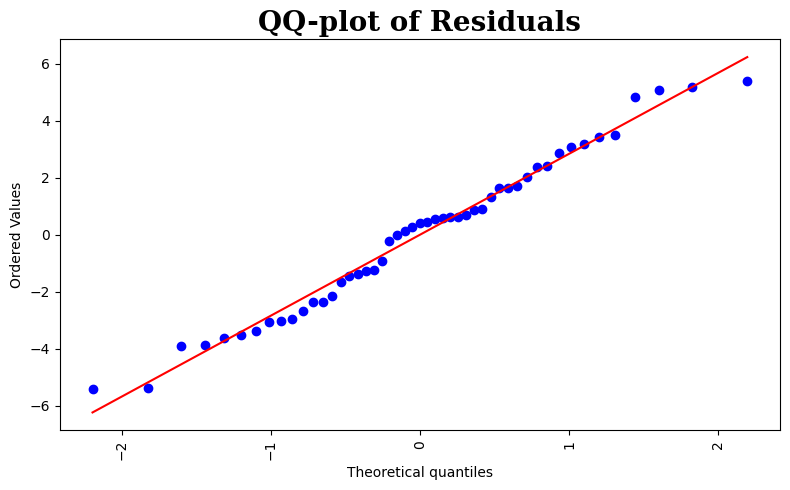

In [62]:
linRegObj1.residual_plots()

### heteroscedastic, variances are not constant. 
### Errors are kinda normally distributed so thats fine.

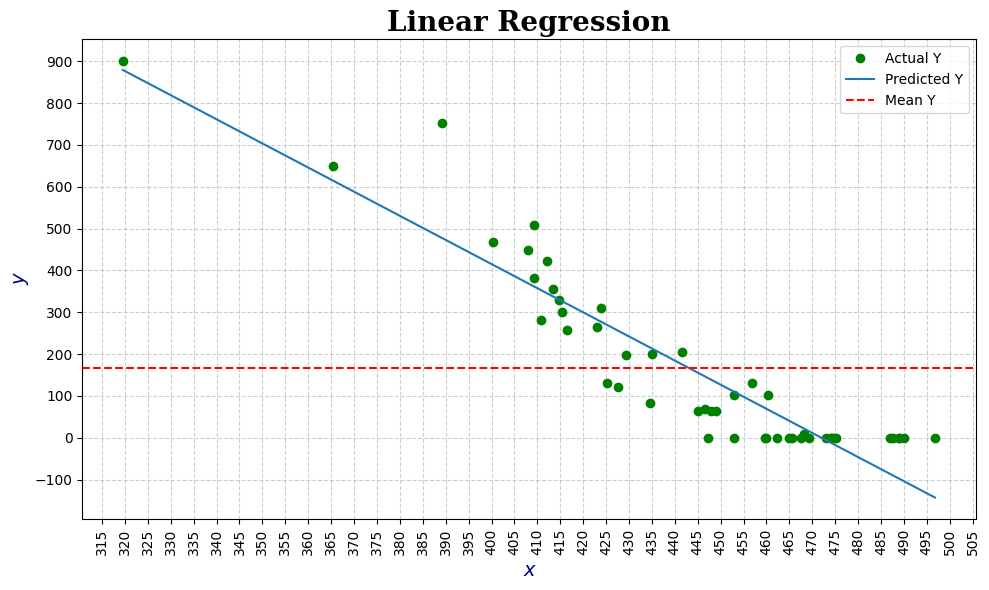

In [63]:
linRegObj2 = ms.LinearRegression.LinearReg(df1["Lap time"] , df1["Est. downforce @ 200 kph"])
linRegObj2.LoRPlot()

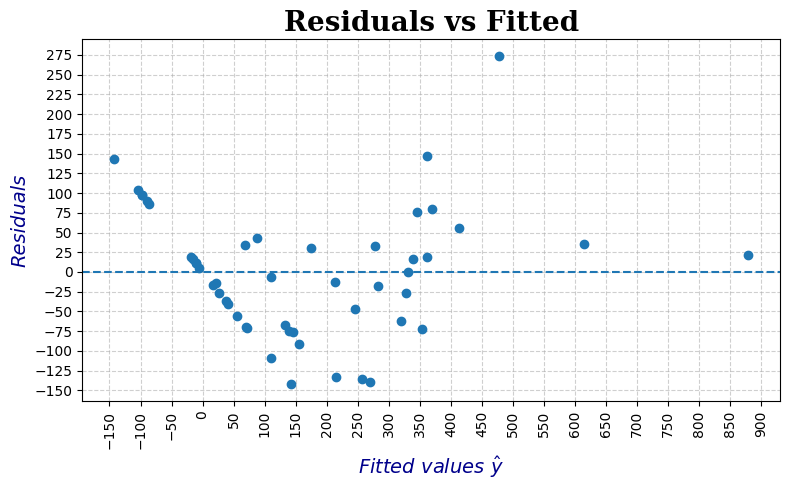

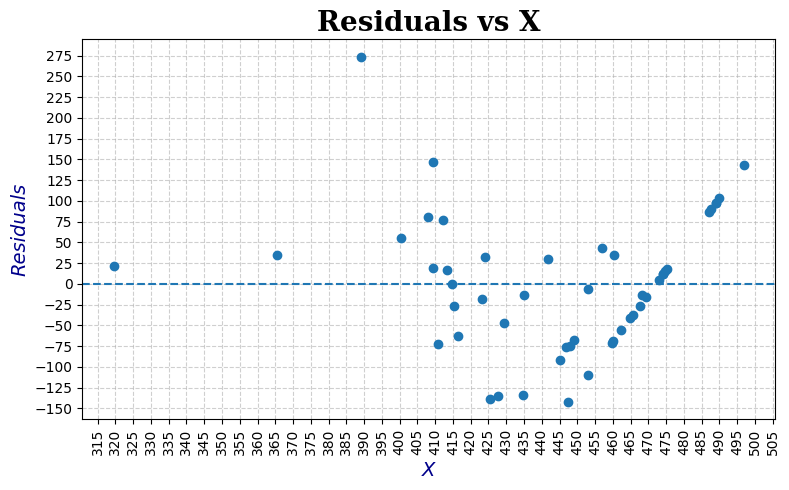

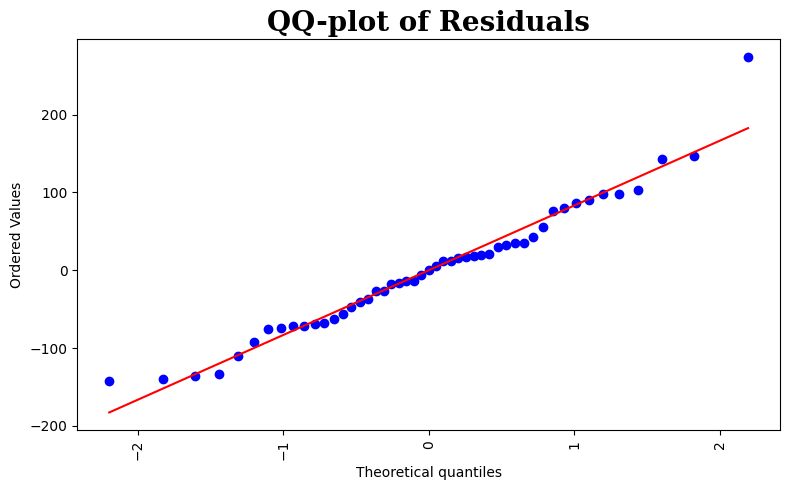

In [64]:
linRegObj2.residual_plots()

### heteroscedastic again. 
### Errors are also kinda fine but tails problems

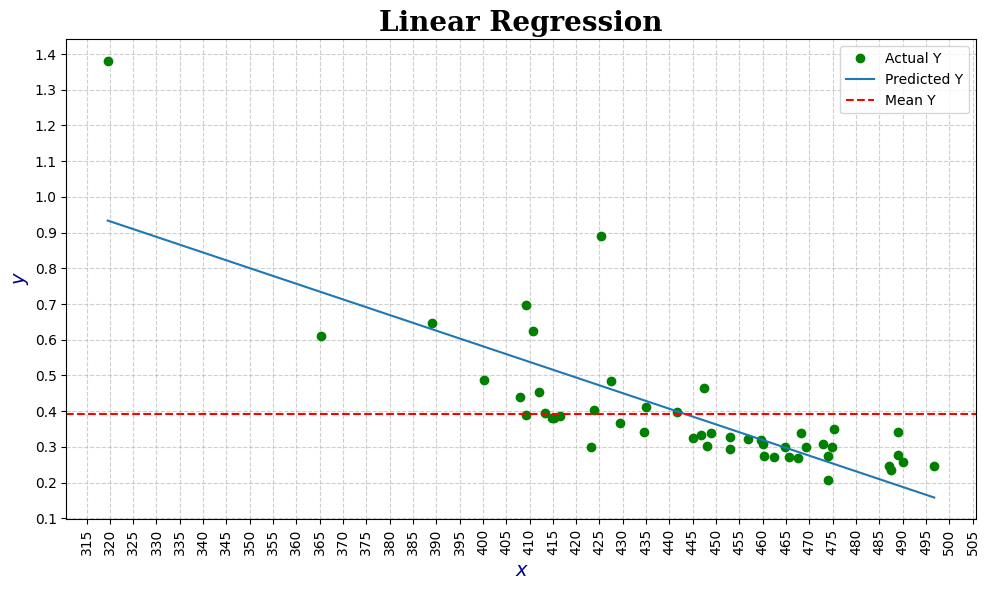

In [65]:
linRegObj3 = ms.LinearRegression.LinearReg(df1["Lap time"] , df1["Power/Weight"])
linRegObj3.LoRPlot()

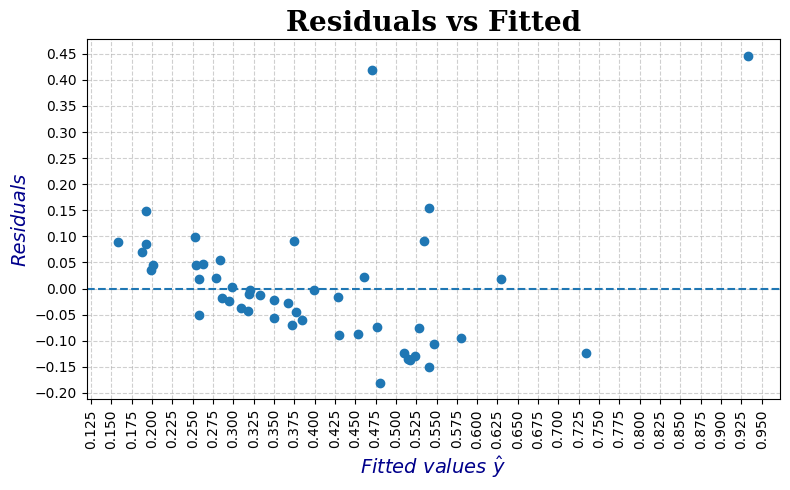

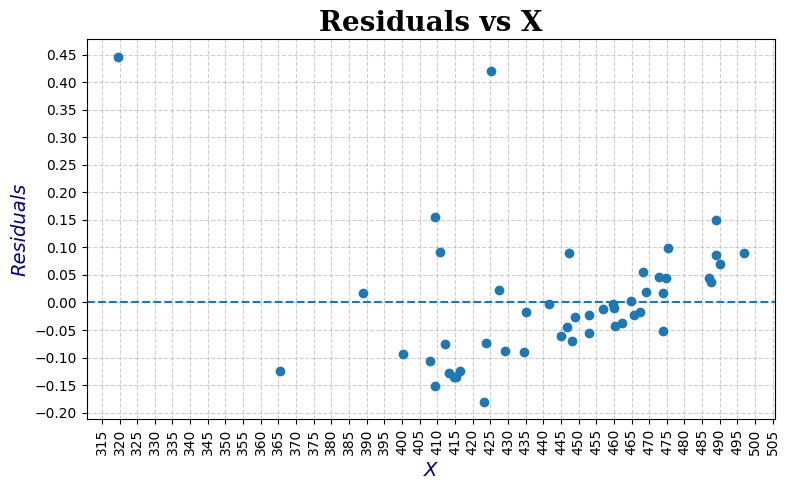

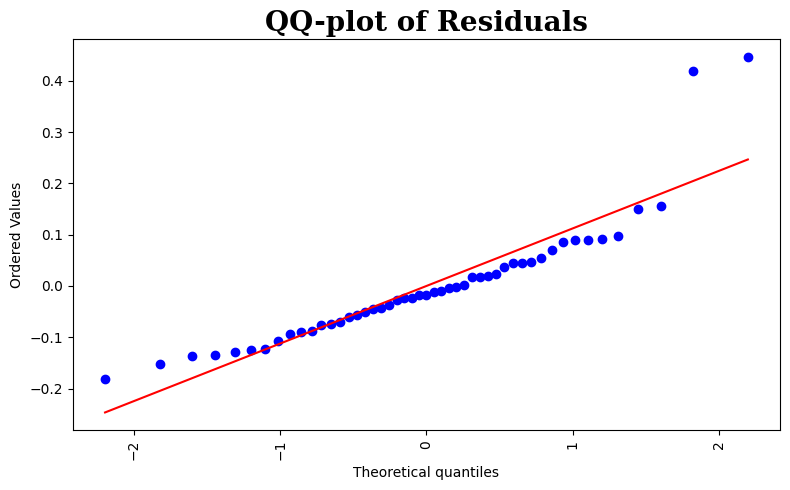

In [66]:
linRegObj3.residual_plots()

### Power to weight is just straight up weird

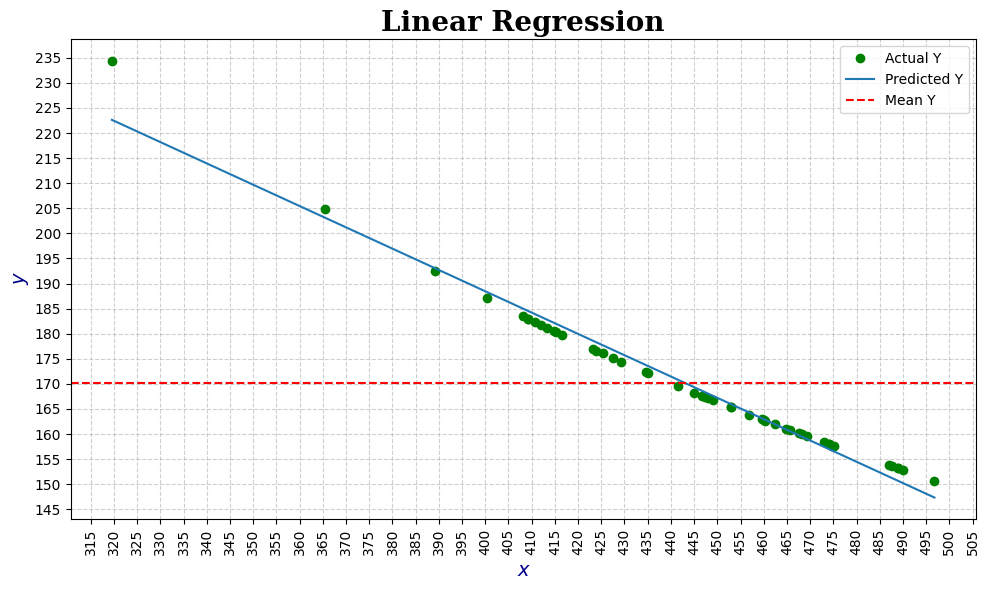

In [67]:
linRegObj4 = ms.LinearRegression.LinearReg(df1["Lap time"] , df1["Avg Speed"])
linRegObj4.LoRPlot()

### WHAT ??

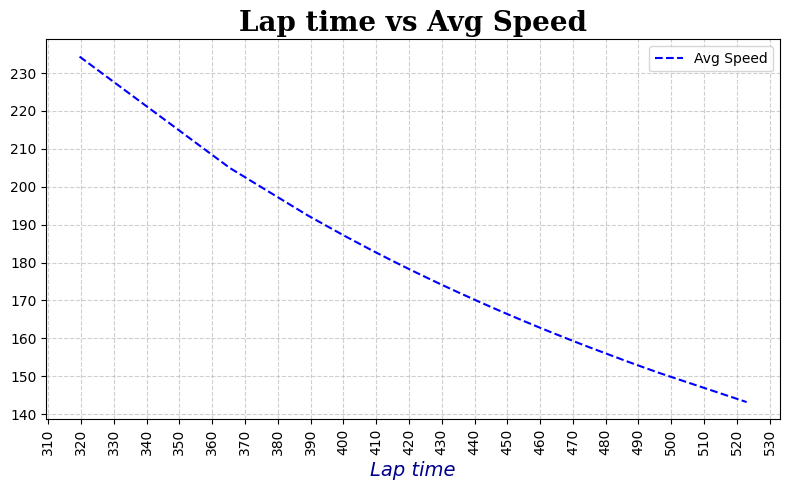

In [68]:
plt.figure(figsize=(8,5))
plt.plot(df["Lap time"] , df["Avg Speed"] , "--b" , label = "Avg Speed")
plt.title("Lap time vs Avg Speed" , title)
plt.xlabel("Lap time" , label)
plt.xticks(rotation = 90) 
plt.grid(True , linestyle = "--" , alpha = 0.6)
plt.locator_params(axis = "x" , nbins = 40)
plt.locator_params(axis = "y" , nbins = 20) 
plt.legend()
plt.tight_layout()
plt.show()

### This cant be linear, seems hyperbolic, I can tell be looking at that dent are 370 - 440

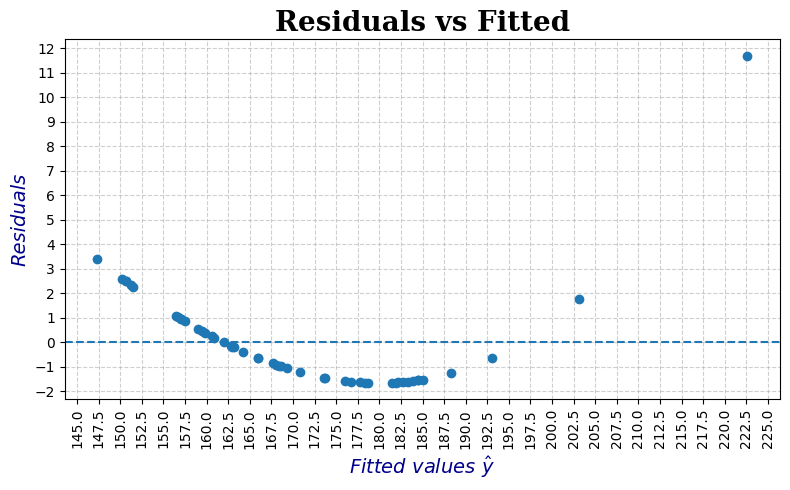

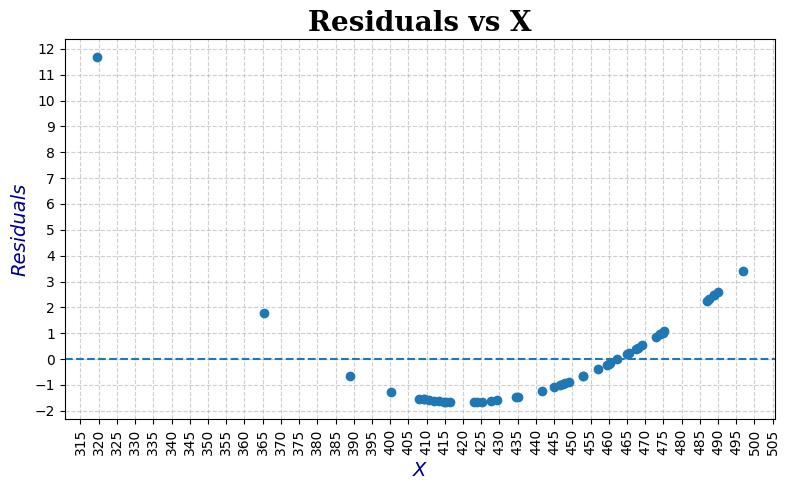

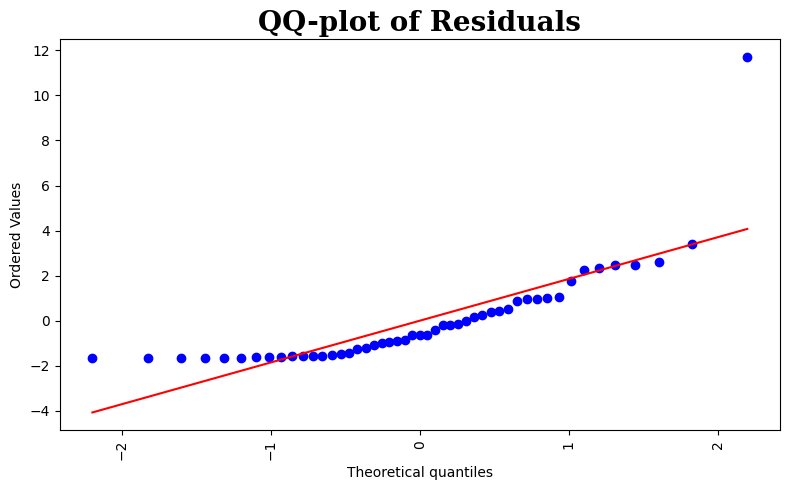

In [69]:
linRegObj4.residual_plots()

### OHHH Big issue: This is clearly non linear. The Residuals vs fitted and x form a parabolic shape!!!

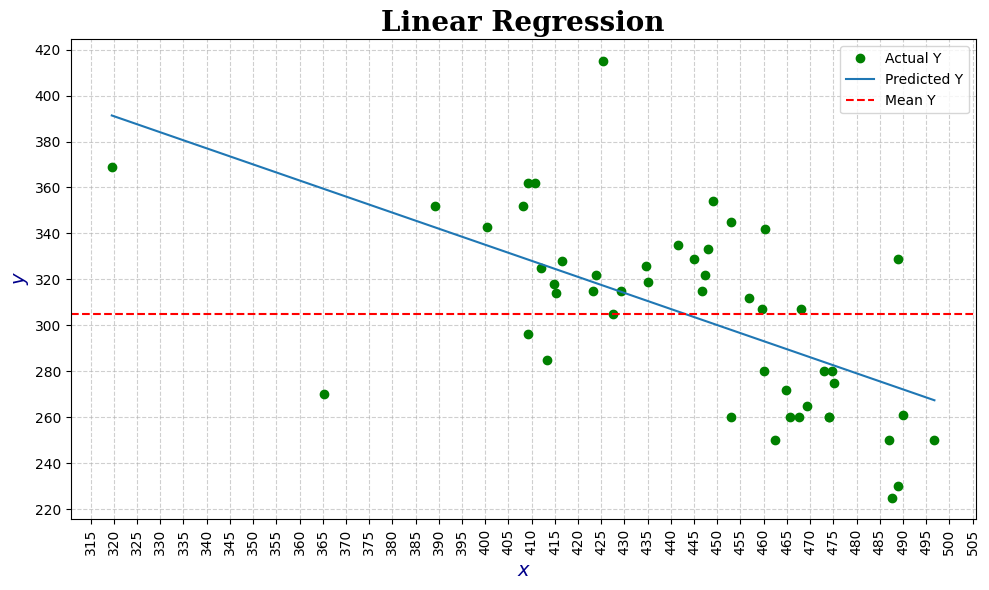

In [70]:
linRegObj5 = ms.LinearRegression.LinearReg(df1["Lap time"] , df1["top speed"])
linRegObj5.LoRPlot()

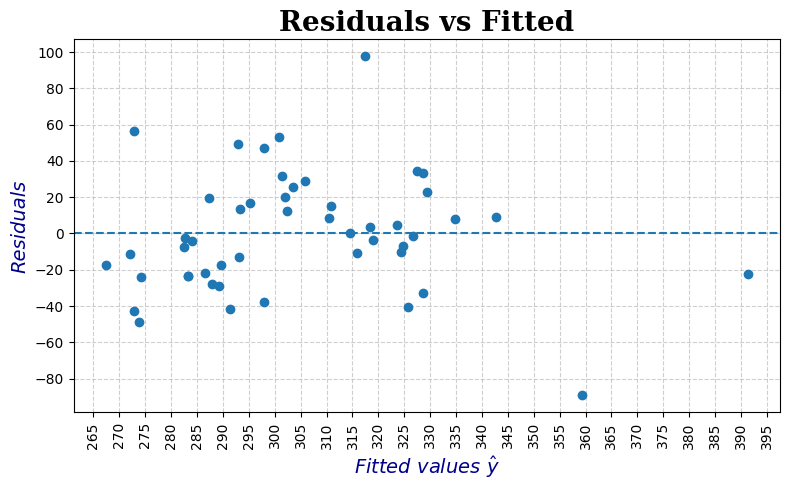

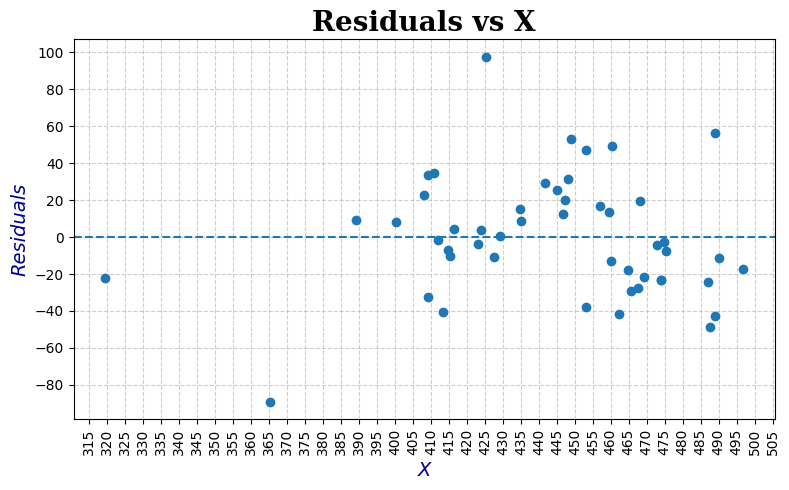

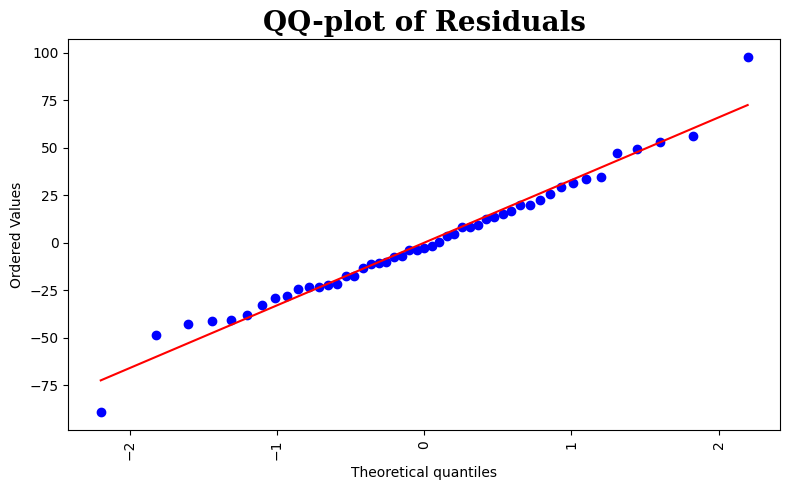

In [71]:
linRegObj5.residual_plots()

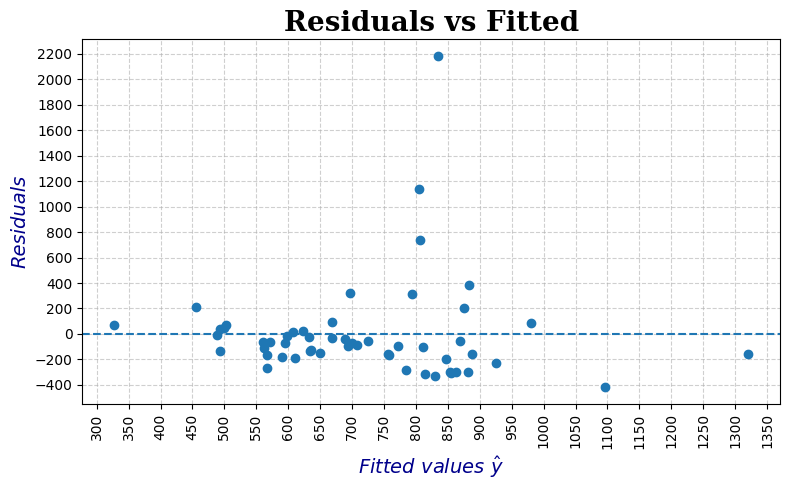

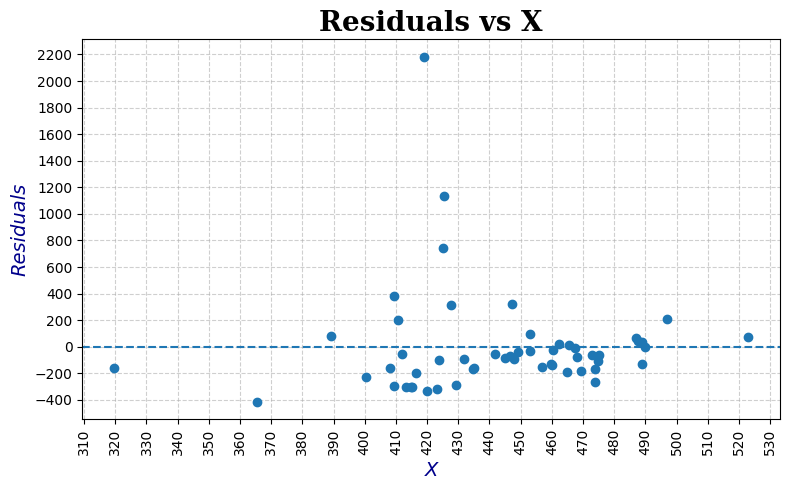

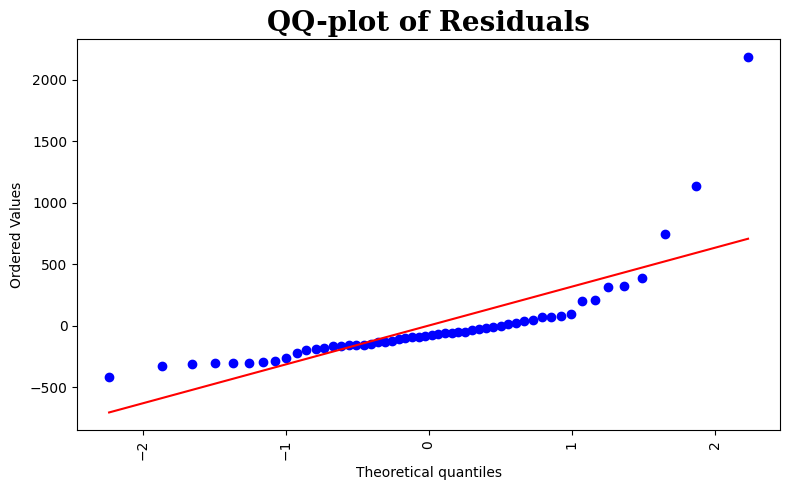

In [72]:
linregObj6 = ms.LinearRegression.LinearReg(df["Lap time"] , df["PS"])
linregObj6.residual_plots()

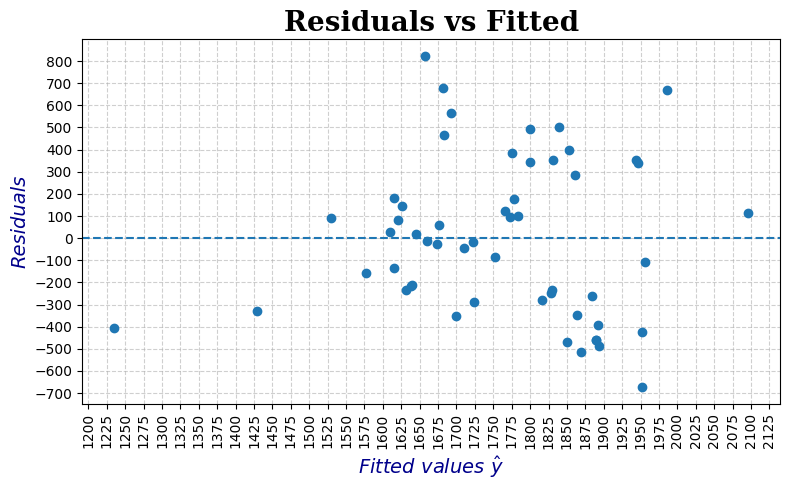

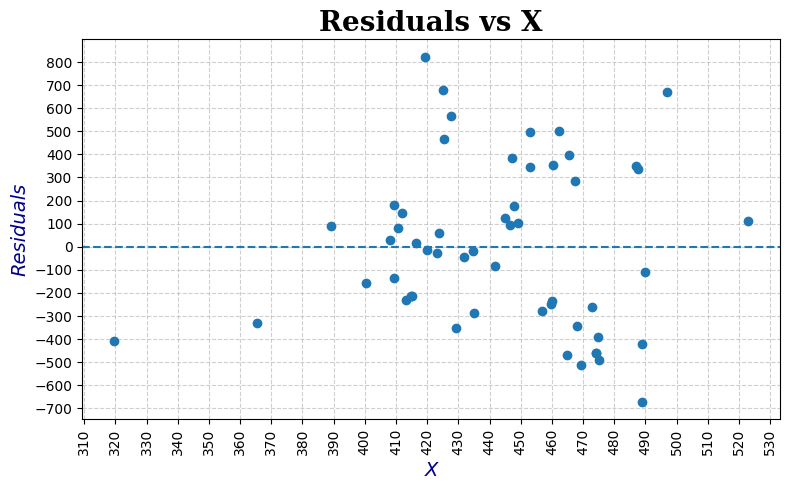

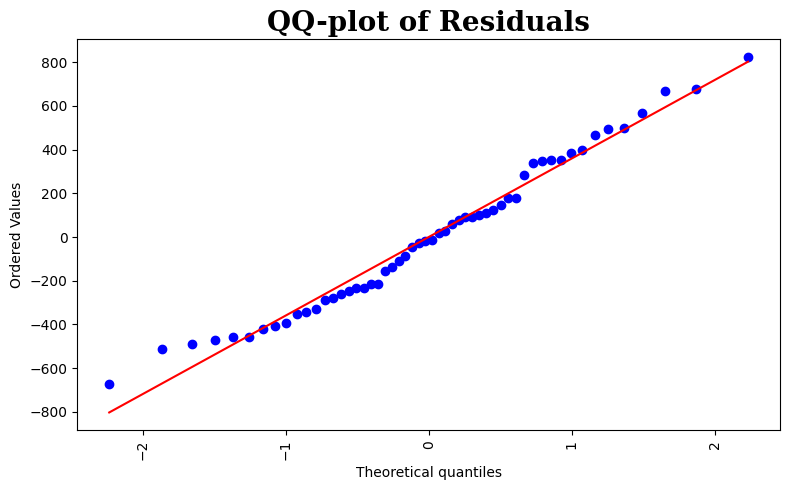

In [73]:
linregObj7 = ms.LinearRegression.LinearReg(df["Lap time"] , df["KG"])
linregObj7.residual_plots()

### This seems fine

![resplotStudt](images/residualPlot.png)

![QQplotStudy](images/qqplot.png)

### This is a pain. I want use 0 - 200, downforce @ 200, power to weight and avg speed but they show many problems.

### So lets try to transform perhaps ? 
### 0-200 is going into log
### downforce at 200 going into log
### P/W is also going into log. 
### Avg speed will be 1/Avg Speed. Avg speed is Hyperbolic wrt laptimes... so inversing it should reduce our problems

# : (

### ill do it in a new data frame, but before that ill convert 0 downforces to something 0.01 (negligible) to not mess with log

In [74]:

df1.loc[df1["Est. downforce @ 200 kph"] == 0, "Est. downforce @ 200 kph"] = 0.01

In [75]:
someDict = {
    "car":df1["Car"],
    "Lap times": df1["Lap time"],
    "0-200": np.log(df1["0-200"]),
    "Est. Downforce @ 200": np.log(df1["Est. downforce @ 200 kph"]),
    "P": np.log(df1["PS"]), 
    "KG":df1["KG"],
    "Avg Speed": 1/df1["Avg Speed"],
    "top speed":np.log(df1["top speed"])
}

someDict

{'car': 0                                Porsche 919 Hybrid Evo
 1                                        Volkswagen IDR
 2                                    Mercedes - AMG One
 3     Porsche 911 GT2 RS Manthey Performance Kit (991) 
 4                                   AMG GT Black Series
 5                             Corvette ZR1X ZTK Package
 6                        Porsche 911 GT3 RS (992) specs
 7                              Corvette ZR1 ZTK Package
 8                                      Ford Mustand GTD
 9     Porsche 911 GT3 RS Manthey Performance Kit (99...
 10        Porsche 911 GT3 Manthey Performance Kit (992)
 11                       Porsche 911 GT3 (992 facelift)
 12                      Lamborghini Huracán Performante
 13    Porsche 718 Cayman GT4 RS Manthey Performance ...
 14                                  Porsche 911 Turbo S
 15                                         Rimac Nevera
 16             Porsche Taycan Turbo GT Weissach Package
 17                     

In [76]:
transdf = pd.DataFrame(someDict)
transdf.head()

car  Lap times     0-200  \
0                             Porsche 919 Hybrid Evo     319.55  1.410987   
1                                     Volkswagen IDR     365.36  1.504077   
2                                 Mercedes - AMG One     389.09  1.945910   
3  Porsche 911 GT2 RS Manthey Performance Kit (991)      400.30  2.054124   
4                                AMG GT Black Series     408.05  2.116256   

   Est. Downforce @ 200         P    KG  Avg Speed  top speed  
0              6.802395  7.056175   829   0.004267   5.910797  
1              6.476972  6.522093  1100   0.004879   5.598422  
2              6.622736  6.968850  1620   0.005196   5.863631  
3              6.150603  6.551080  1420   0.005346   5.837730  
4              6.107023  6.593045  1637   0.005449   5.863631

### Now ill standardize

In [77]:
transdf["z 0-200"] = (transdf["0-200"] - transdf["0-200"].mean()) / transdf["0-200"].std()
transdf["z downforce"] = (transdf["Est. Downforce @ 200"] - transdf["Est. Downforce @ 200"].mean()) / transdf["Est. Downforce @ 200"].std()
transdf["z P"] = (transdf["P"] - transdf["P"].mean()) / transdf["P"].std()
transdf["z KG"] = (transdf["KG"] - transdf["KG"].mean()) / transdf["KG"].std()
transdf["z Avg Speed"] = (transdf["Avg Speed"] - transdf["Avg Speed"].mean()) / transdf["Avg Speed"].std()
transdf["z top speed"] = (transdf["top speed"] - transdf["top speed"].mean()) / transdf["top speed"].std()
transdf.head()


car  Lap times     0-200  \
0                             Porsche 919 Hybrid Evo     319.55  1.410987   
1                                     Volkswagen IDR     365.36  1.504077   
2                                 Mercedes - AMG One     389.09  1.945910   
3  Porsche 911 GT2 RS Manthey Performance Kit (991)      400.30  2.054124   
4                                AMG GT Black Series     408.05  2.116256   

   Est. Downforce @ 200         P    KG  Avg Speed  top speed   z 0-200  \
0              6.802395  7.056175   829   0.004267   5.910797 -2.344936   
1              6.476972  6.522093  1100   0.004879   5.598422 -2.118657   
2              6.622736  6.968850  1620   0.005196   5.863631 -1.044671   
3              6.150603  6.551080  1420   0.005346   5.837730 -0.781631   
4              6.107023  6.593045  1637   0.005449   5.863631 -0.630604   

   z downforce       z P      z KG  z Avg Speed  z top speed  
0     1.117725  1.828734 -2.403974    -3.522336     1.477919  
1     1.052227  0.253679 -1.677822    -2.216104    -0.834953  
2     1.081565  1.571206 -0.284467    -1.539465     1.128698  
3     0.986538  0.339166 -0.820373    -1.219822     0.936925  
4     0.977767  0.462922 -0.238915    -0.998837     1.128698

In [78]:
import statsmodels.api as sm # I dont want to code multi linear regression rn by myself.

X = transdf[["z 0-200", "z downforce", "z P","z KG" , "z Avg Speed" , "z top speed"]]
y = transdf['Lap times']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Lap times   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.221e+29
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        02:21:56   Log-Likelihood:                 1380.3
No. Observations:                  49   AIC:                            -2747.
Df Residuals:                      42   BIC:                            -2733.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         443.0796   2.18e-14   2.03e+16      

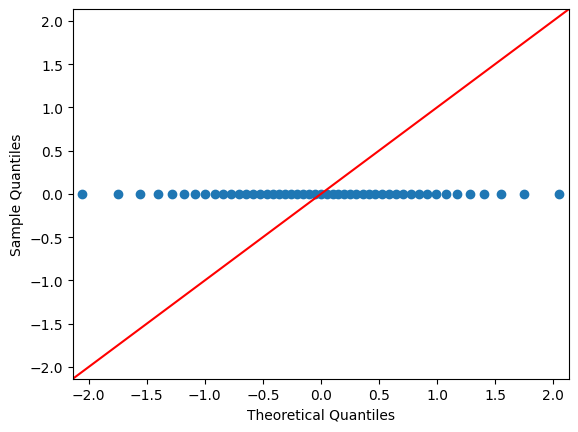

In [79]:
sm.qqplot(model.resid, line='45')
plt.show()

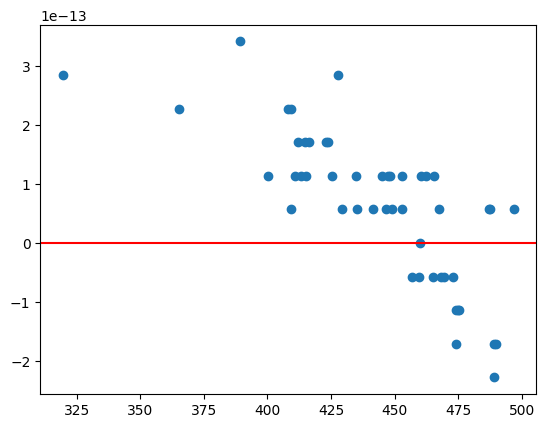

In [80]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red')
plt.show()

### Woah woah woah... I think this might be happening because avg speed(lap length / lap time) already contains the lap times....

In [81]:
X = transdf[["z 0-200", "z downforce", "z P" , "z KG" , "top speed"]]
y = transdf['Lap times']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Lap times   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     66.86
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           3.61e-19
Time:                        02:21:56   Log-Likelihood:                -190.12
No. Observations:                  49   AIC:                             392.2
Df Residuals:                      43   BIC:                             403.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.9442    135.729      0.110      

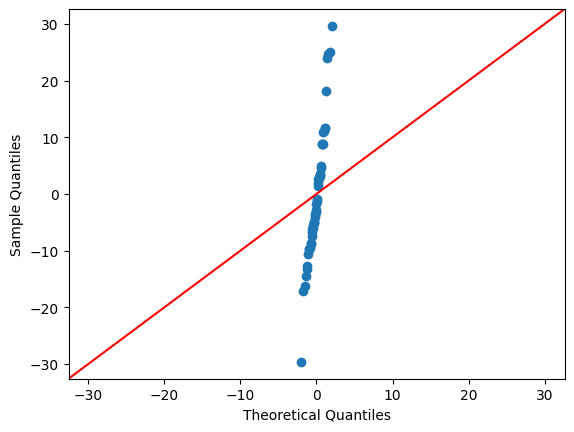

In [82]:
sm.qqplot(model.resid, line='45')
plt.show()

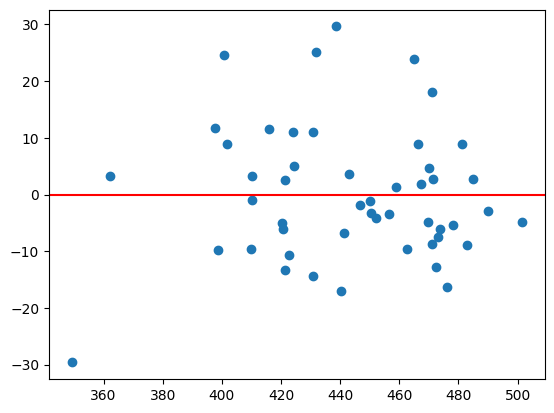

In [83]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red')
plt.show()

### To be fair, Lap times arent really normal. Lap times are not normal

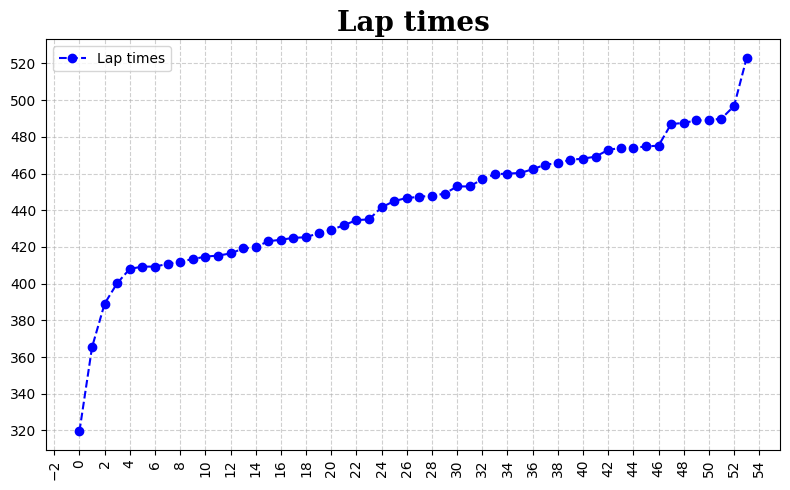

In [84]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,54) , df["Lap time"] , "o--b" , label = "Lap times")
plt.title("Lap times" , title)
plt.xticks(rotation = 90) 
plt.grid(True , linestyle = "--" , alpha = 0.6)
plt.locator_params(axis = "x" , nbins = 30)
plt.locator_params(axis = "y" , nbins = 20) 
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_29116\3601682177.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


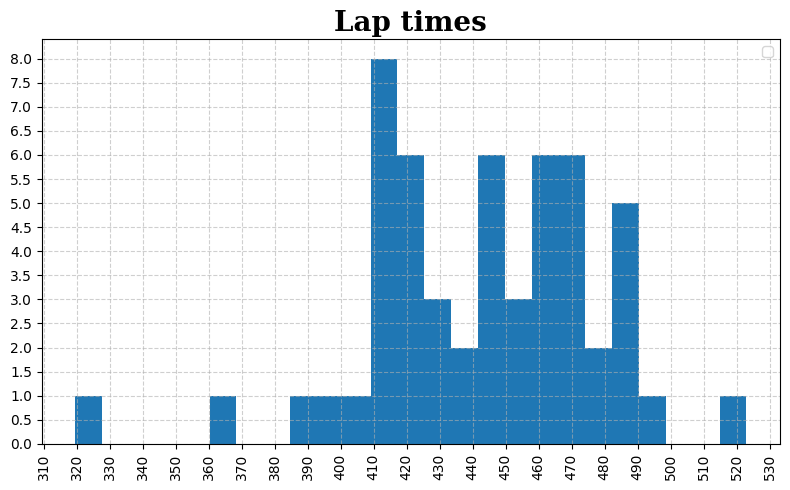

In [85]:
plt.figure(figsize=(8,5))
plt.hist(df["Lap time"] , bins = 25)
plt.title("Lap times" , title)
plt.xticks(rotation = 90) 
plt.grid(True , linestyle = "--" , alpha = 0.6)
plt.locator_params(axis = "x" , nbins = 30)
plt.locator_params(axis = "y" , nbins = 20) 
plt.legend()
plt.tight_layout()
plt.show()

### Perhaps taking log might fix it ? 

In [86]:
transdf['log_lap'] = np.log(transdf['Lap times'])

In [87]:
X = transdf[["z 0-200", "z downforce", "z P","z KG" , "top speed"]]
y = transdf['log_lap']

X = sm.add_constant(X)
model_log = sm.OLS(y, X).fit()

print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                log_lap   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     60.49
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.36e-18
Time:                        02:21:57   Log-Likelihood:                 103.80
No. Observations:                  49   AIC:                            -195.6
Df Residuals:                      43   BIC:                            -184.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.9871      0.337     14.799      

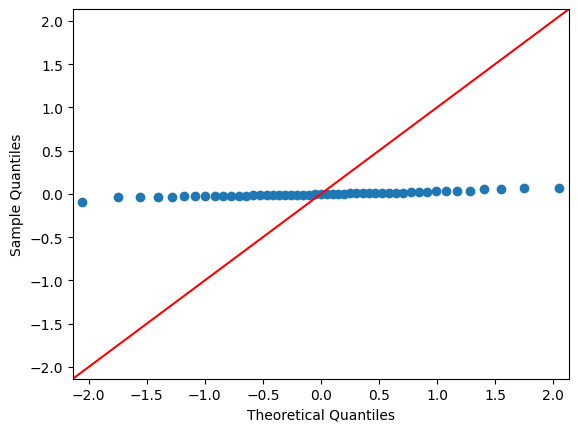

In [88]:
sm.qqplot(model_log.resid, line='45')
plt.show()

### Not really, it just reduced the errors from 30-40 seconds to 5-6 (after taking log)

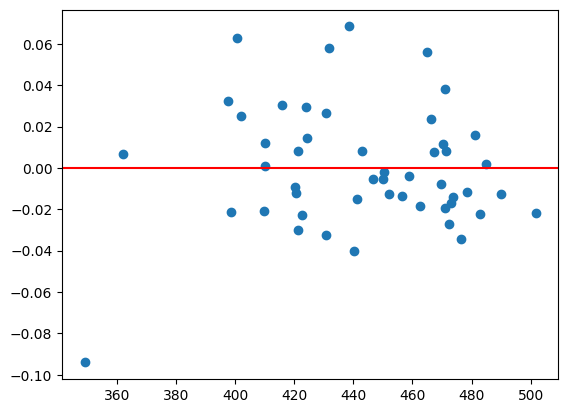

In [89]:
plt.scatter(model.fittedvalues, model_log.resid)
plt.axhline(0, color='red')
plt.show()

### The scatter plots are pretty good.

### Log Lap times

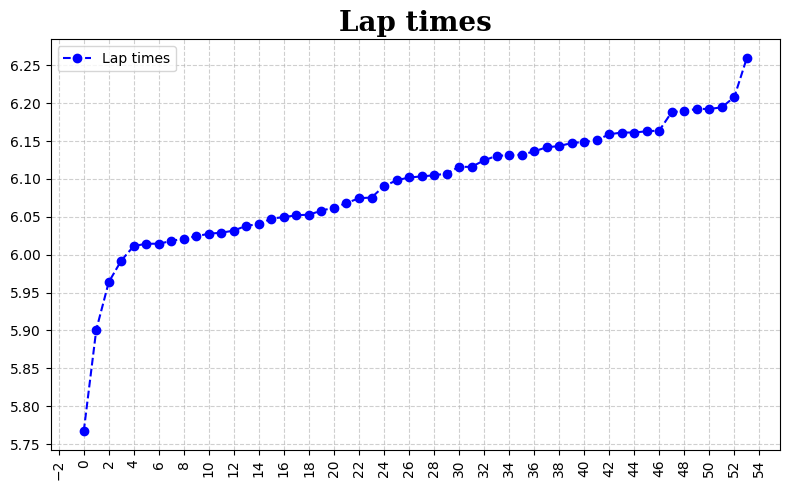

In [90]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,54) , np.log(df["Lap time"]) , "o--b" , label = "Lap times")
plt.title("Lap times" , title)
plt.xticks(rotation = 90) 
plt.grid(True , linestyle = "--" , alpha = 0.6)
plt.locator_params(axis = "x" , nbins = 30)
plt.locator_params(axis = "y" , nbins = 20) 
plt.legend()
plt.tight_layout()
plt.show()

### This is what is making the errors quite small... 

### Note: For the following parts I relied heavily on AI as I am still not proficient with sci-kit learn

In [91]:
transdf.head()

car  Lap times     0-200  \
0                             Porsche 919 Hybrid Evo     319.55  1.410987   
1                                     Volkswagen IDR     365.36  1.504077   
2                                 Mercedes - AMG One     389.09  1.945910   
3  Porsche 911 GT2 RS Manthey Performance Kit (991)      400.30  2.054124   
4                                AMG GT Black Series     408.05  2.116256   

   Est. Downforce @ 200         P    KG  Avg Speed  top speed   z 0-200  \
0              6.802395  7.056175   829   0.004267   5.910797 -2.344936   
1              6.476972  6.522093  1100   0.004879   5.598422 -2.118657   
2              6.622736  6.968850  1620   0.005196   5.863631 -1.044671   
3              6.150603  6.551080  1420   0.005346   5.837730 -0.781631   
4              6.107023  6.593045  1637   0.005449   5.863631 -0.630604   

   z downforce       z P      z KG  z Avg Speed  z top speed   log_lap  
0     1.117725  1.828734 -2.403974    -3.522336     1.477919  5.766914  
1     1.052227  0.253679 -1.677822    -2.216104    -0.834953  5.900883  
2     1.081565  1.571206 -0.284467    -1.539465     1.128698  5.963811  
3     0.986538  0.339166 -0.820373    -1.219822     0.936925  5.992214  
4     0.977767  0.462922 -0.238915    -0.998837     1.128698  6.011390

In [92]:
from sklearn.linear_model import LinearRegression

X = transdf[['z downforce', 'z P' , 'z KG' , 'z 0-200' , 'z top speed']].values
y = transdf['log_lap'].values

# remove any row that has NaN or inf
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
X = X[mask]
y = y[mask]

model = LinearRegression()
model.fit(X, y)

print("coef:", model.coef_)
print("intercept:", model.intercept_)



coef: [-0.03463877 -0.03518492  0.03985459  0.02949293  0.02609351]
intercept: 6.090470041922768


In [93]:
model.fit(X,y)

LinearRegression()

In [94]:
def predict_lap_from_z(z_df, z_p , z_kg , z_0_200,z_top_speed):
    log_pred = model.predict([[z_df, z_p , z_kg,z_0_200,z_top_speed]])[0]
    return float(np.exp(log_pred))


In [95]:
transdf.describe()

Lap times      0-200  Est. Downforce @ 200          P           KG  \
count   49.000000  49.000000             49.000000  49.000000    49.000000   
mean   443.079592   2.375683              1.249086   6.436073  1726.163265   
std     35.070365   0.411396              4.968402   0.339088   373.200089   
min    319.550000   1.410987             -4.605170   5.703782   829.000000   
25%    416.450000   2.219203             -4.605170   6.234411  1430.000000   
50%    448.000000   2.360854              4.248495   6.396930  1645.000000   
75%    468.140000   2.740840              5.638355   6.522093  1957.000000   
max    496.780000   3.054001              6.802395   7.570959  2655.000000   

       Avg Speed  top speed       z 0-200   z downforce           z P  \
count  49.000000  49.000000  4.900000e+01  4.900000e+01  4.900000e+01   
mean    0.005917   5.711190  1.903239e-16  4.531523e-17 -1.177063e-15   
std     0.000468   0.135059  1.000000e+00  1.000000e+00  1.000000e+00   
min     0.004267   5.416100 -2.344936e+00 -1.178297e+00 -2.159588e+00   
25%     0.005562   5.598422 -3.803635e-01 -1.178297e+00 -5.947201e-01   
50%     0.005983   5.749393 -3.604649e-02  6.036970e-01 -1.154379e-01   
75%     0.006252   5.796058  8.876047e-01  8.834368e-01  2.536790e-01   
max     0.006634   6.028279  1.648821e+00  1.117725e+00  3.346874e+00   

               z KG   z Avg Speed   z top speed    log_lap  
count  4.900000e+01  4.900000e+01  4.900000e+01  49.000000  
mean   1.359457e-16 -1.033187e-15 -6.434762e-16   6.090470  
std    1.000000e+00  1.000000e+00  1.000000e+00   0.083317  
min   -2.403974e+00 -3.522336e+00 -2.184891e+00   5.766914  
25%   -7.935777e-01 -7.593189e-01 -8.349531e-01   6.031766  
50%   -2.174792e-01  1.403010e-01  2.828604e-01   6.104793  
75%    6.185334e-01  7.145751e-01  6.283737e-01   6.148767  
max    2.488844e+00  1.531219e+00  2.347773e+00   6.208147

In [96]:
def zConverter(df_ , p_ , kg_, _0_200 , top_speed):
    if df_ == 0:
        df_ = 0.01
    df_ = np.log(df_)
    p_ = np.log(p_)
    _0_200 = np.log(_0_200)
    top_speed = np.log(top_speed)
    zkg = (kg_ - 1726.163265) / 373.200089
    zp = (p_ -6.436073)/0.339088
    zdf = (df_ - 1.249086) / 4.968402
    z_0_200 = (_0_200 - 2.37568)/0.411396
    z_top_speed = (top_speed -5.711190)/0.135059
    return [zdf, zp,zkg, z_0_200, z_top_speed]

In [97]:
def RegPredictor(df, p , kg , _0_200 ,top_speed):
    z_df , z_p , z_kg , z_0_200 , z_top_speed = zConverter(df , p ,kg , _0_200 , top_speed)
    log_pred = model.predict([[z_df , z_p , z_kg , z_0_200 ,z_top_speed]])[0]
    return float(np.exp(log_pred))

### Let us try to predict for Aventador SVJ

In [112]:
RegPredictor(260 , 790 , 1450 , 8, 354)

409.8304804876903

In [110]:
6*60 + 49.42

409.42

In [113]:
409.42 - RegPredictor(260 , 790 , 1450 , 8, 354)

-0.410480487690279